In [ ]:
import rioxarray as rxa
import os
from os.path import join, expanduser, exists
from glob import glob
import numpy as np
import pandas as pd
import pickle
from datetime import date, datetime
from ulmo_extract import get_snotel_within_image
from uavsar_pytools.georeference import reproject_clip_mask

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
fp = expanduser('~/scratch/data/uavsar/image_fps')
full_fps = pickle.load(open(fp, "rb"))
gm_fps = [dic for dic in full_fps if dic['location'] == 'Grand Mesa, CO']
image_fps = [dic for dic in gm_fps if dic['flight1'].date() == datetime(2021,3,10).date()]
image_fps = [dic for dic in image_fps if dic['flight2'].date() == datetime(2021,3,16).date()]
image_fps = [dic for dic in image_fps if dic['pol'] == 'VV']
assert len(image_fps) == 1
fps = image_fps[0]

In [6]:
fp = expanduser('~/scratch/data/uavsar/image_fps')
full_fps = pickle.load(open(fp, "rb"))
locs = np.unique([fs['location'] for fs in full_fps])

# Just VV vs VH with temp plots

In [ ]:
fig_dir = '/bsuhome/zacharykeskinen/uavsar/figures/coherence_wx_elev_compares'
pol_cols = {'VV':'red'}

for loc in locs:
    loc_fps = [dic for dic in full_fps if dic['location'] == loc]
    loc_fig_dir= join(fig_dir, loc.replace(' ',''))
    os.makedirs(loc_fig_dir, exist_ok=True)

    fps_2021 = [fs for fs in loc_fps if fs['flight1'] > pd.to_datetime('2020-10-01').tz_localize('UTC')]
    if len(fps_2021)>1:
        res = pd.DataFrame()
        for i, fps in enumerate(fps_2021):
            mean_cor = float(rxa.open_rasterio(fps['cor']).mean())
            d = {} 
            d['pol'] = fps['pol']
            d['date1'] = fps['flight1']
            d['date2'] = fps['flight2']
            d['coherence'] = mean_cor
            res = res.append(d, ignore_index = True)

        f,ax = plt.subplots(figsize = (12,8), dpi = 200)
        for i, r in res.iterrows():
                if r.pol in pol_cols.keys():
                    plt.scatter(x = [r.date1, r.date2], y = [r.coherence, r.coherence], marker = '|', color = 'blue')
                    plt.plot([r.date1, r.date2], [r.coherence, r.coherence], color = pol_cols[r.pol])

        markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in pol_cols.values()]
        plt.legend(markers, pol_cols.keys(), numpoints=1)

        ax2 = ax.twinx()
        xlims = ax.get_xlim()
        start = pd.to_datetime(mdates.num2date(xlims[0]))
        end = pd.to_datetime(mdates.num2date(xlims[1]))
        wx = get_snotel_within_image(fps['fp'], fps['ann'], start, end)
        t = pd.date_range(start, end, len(wx[next(iter(wx))]['SNOTEL:TOBS_H']))
        # ax2.plot(t, wx[next(iter(wx))]['SNOTEL:TOBS_H'], alpha = 0.6, color = 'blue')
        daily = pd.DataFrame(wx[next(iter(wx))]['SNOTEL:TOBS_H'], index = t).resample('D').mean()
        daily.plot(ax = ax2, alpha = 0.6)
        ax2.axhline(0, ls = '--', linewidth = '.5', color = 'red')


        ax.set_ylabel('Mean Scene Wide Coherence', color='black')
        ax.set_ylim(0.3, 0.8)
        ax2.set_ylabel('Temperature', color='b')

        plt.title(f'Mean Coherence for {loc} for 2021')
        plt.savefig(join(loc_fig_dir, '2021.png'), dpi = 200)

    fps_2020 = [fs for fs in loc_fps if fs['flight1'] < pd.to_datetime('2020-10-01').tz_localize('UTC')]
    if len(fps_2020)>1:
        res = pd.DataFrame()
        for i, fps in enumerate(fps_2020):
            mean_cor = float(rxa.open_rasterio(fps['cor']).mean())
            d = {} 
            d['pol'] = fps['pol']
            d['date1'] = fps['flight1']
            d['date2'] = fps['flight2']
            d['coherence'] = mean_cor
            res = res.append(d, ignore_index = True)

        f,ax = plt.subplots(figsize = (12,8), dpi = 200)
        for i, r in res.iterrows():
            if r.pol in pol_cols.keys():
                plt.scatter(x = [r.date1, r.date2], y = [r.coherence, r.coherence], marker = '|', color = 'blue')
                plt.plot([r.date1, r.date2], [r.coherence, r.coherence], color = pol_cols[r.pol])

        markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in pol_cols.values()]
        plt.legend(markers, pol_cols.keys(), numpoints=1)

        ax2 = ax.twinx()
        xlims = ax.get_xlim()
        start = pd.to_datetime(mdates.num2date(xlims[0]))
        end = pd.to_datetime(mdates.num2date(xlims[1]))
        wx = get_snotel_within_image(fps['fp'], fps['ann'], start, end)
        t = pd.date_range(start, end, len(wx[next(iter(wx))]['SNOTEL:TOBS_H']))
        # ax2.plot(t, wx[next(iter(wx))]['SNOTEL:TOBS_H'])
        daily = pd.DataFrame(wx[next(iter(wx))]['SNOTEL:TOBS_H'], index = t).resample('D').mean()
        daily.plot(ax = ax2, alpha = 0.6)
        ax2.axhline(0, ls = '--', linewidth = '.5', color = 'red')


        ax.set_ylim(0.3, 0.8)
        ax.set_ylabel('Mean Scene Wide Coherence', color='black')
        ax2.set_ylabel('Temperature', color='b')
        plt.title(f'Mean Coherence for {loc} for 2020')
        plt.savefig(join(loc_fig_dir, '2020.png'), dpi = 200)

## Elevation Subset

Unable to fetch SNOTEL:WTEQ_H


Unable to fetch SNOTEL:SNWD_H


Unable to fetch SNOTEL:TOBS_H


Unable to fetch SNOTEL:WTEQ_H


Unable to fetch SNOTEL:SNWD_H


Unable to fetch SNOTEL:TOBS_H


StopIteration: 

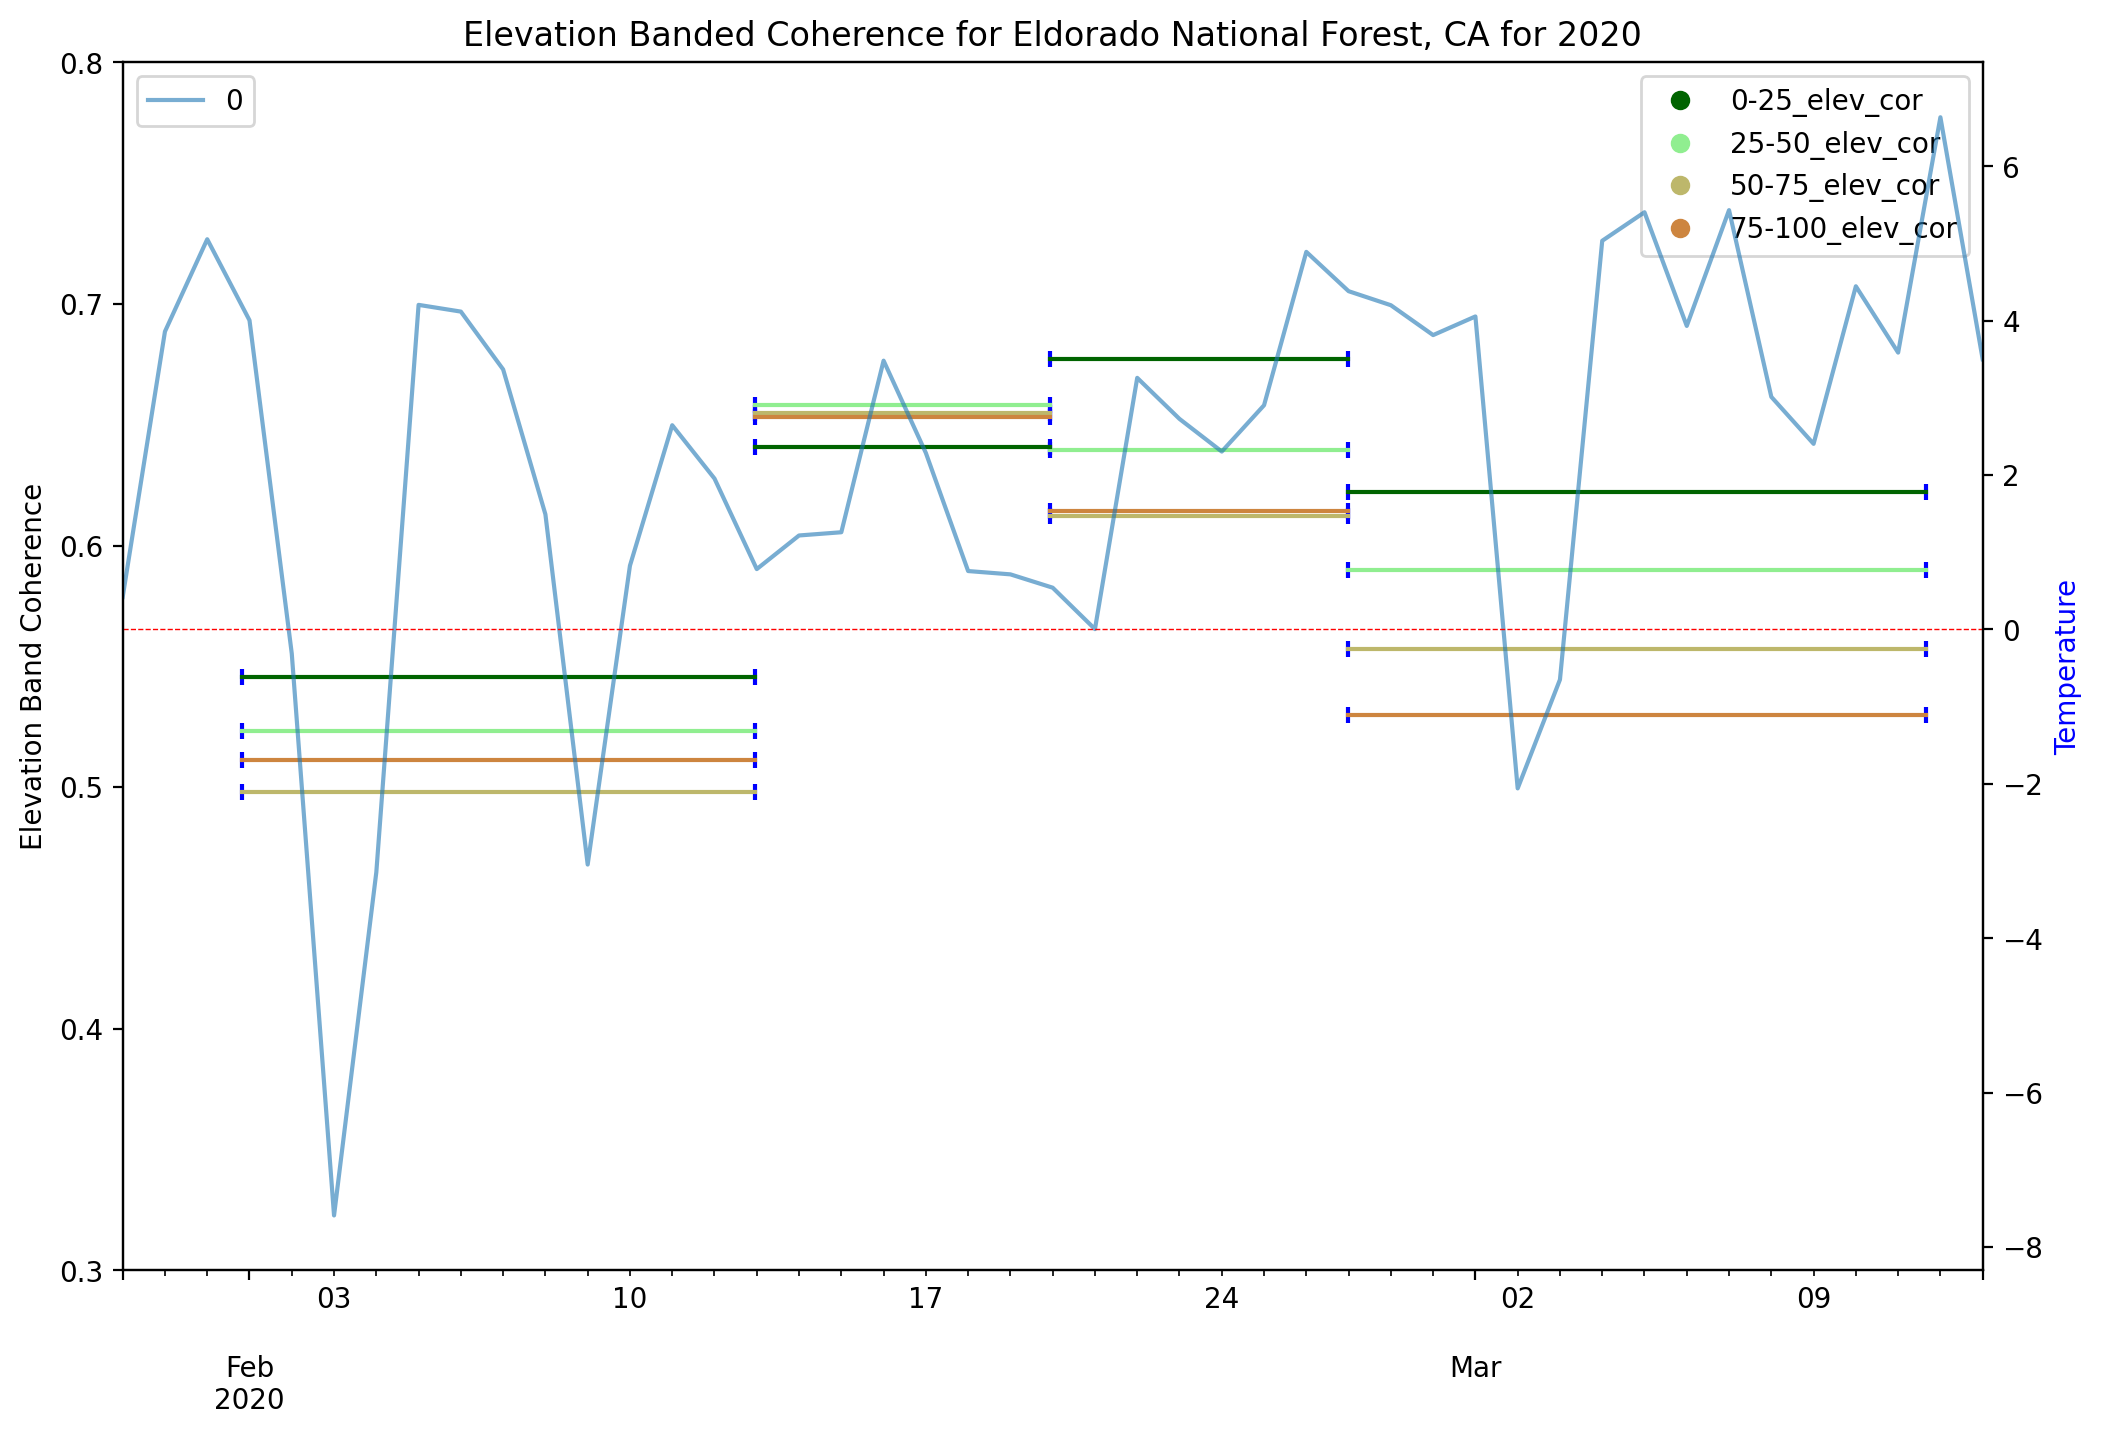

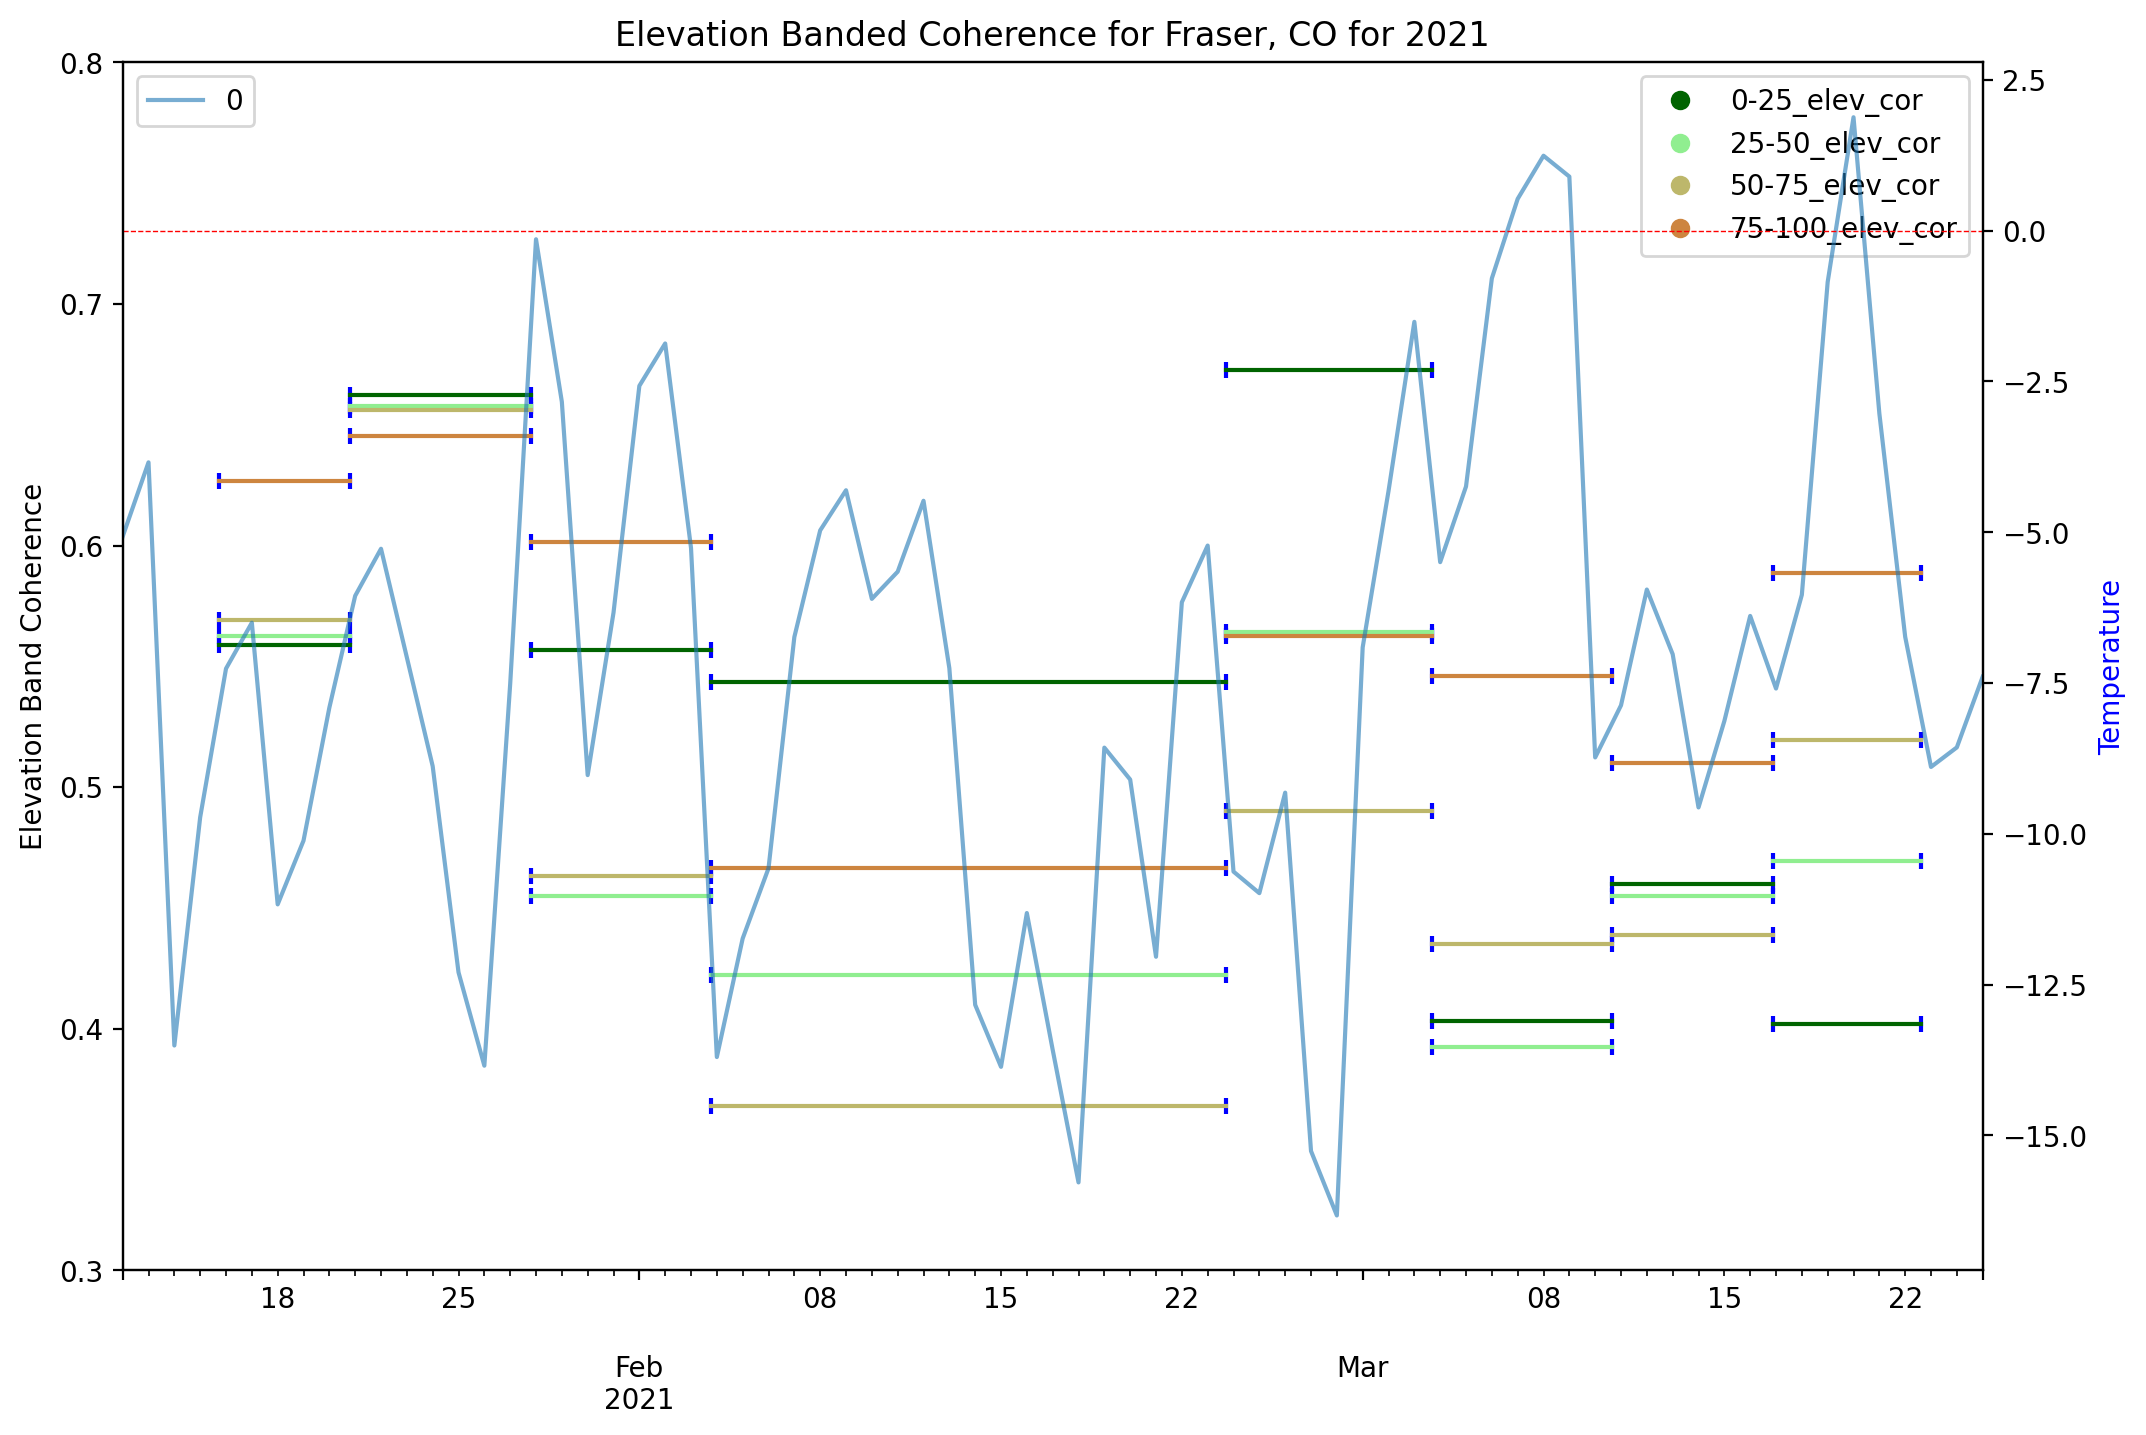

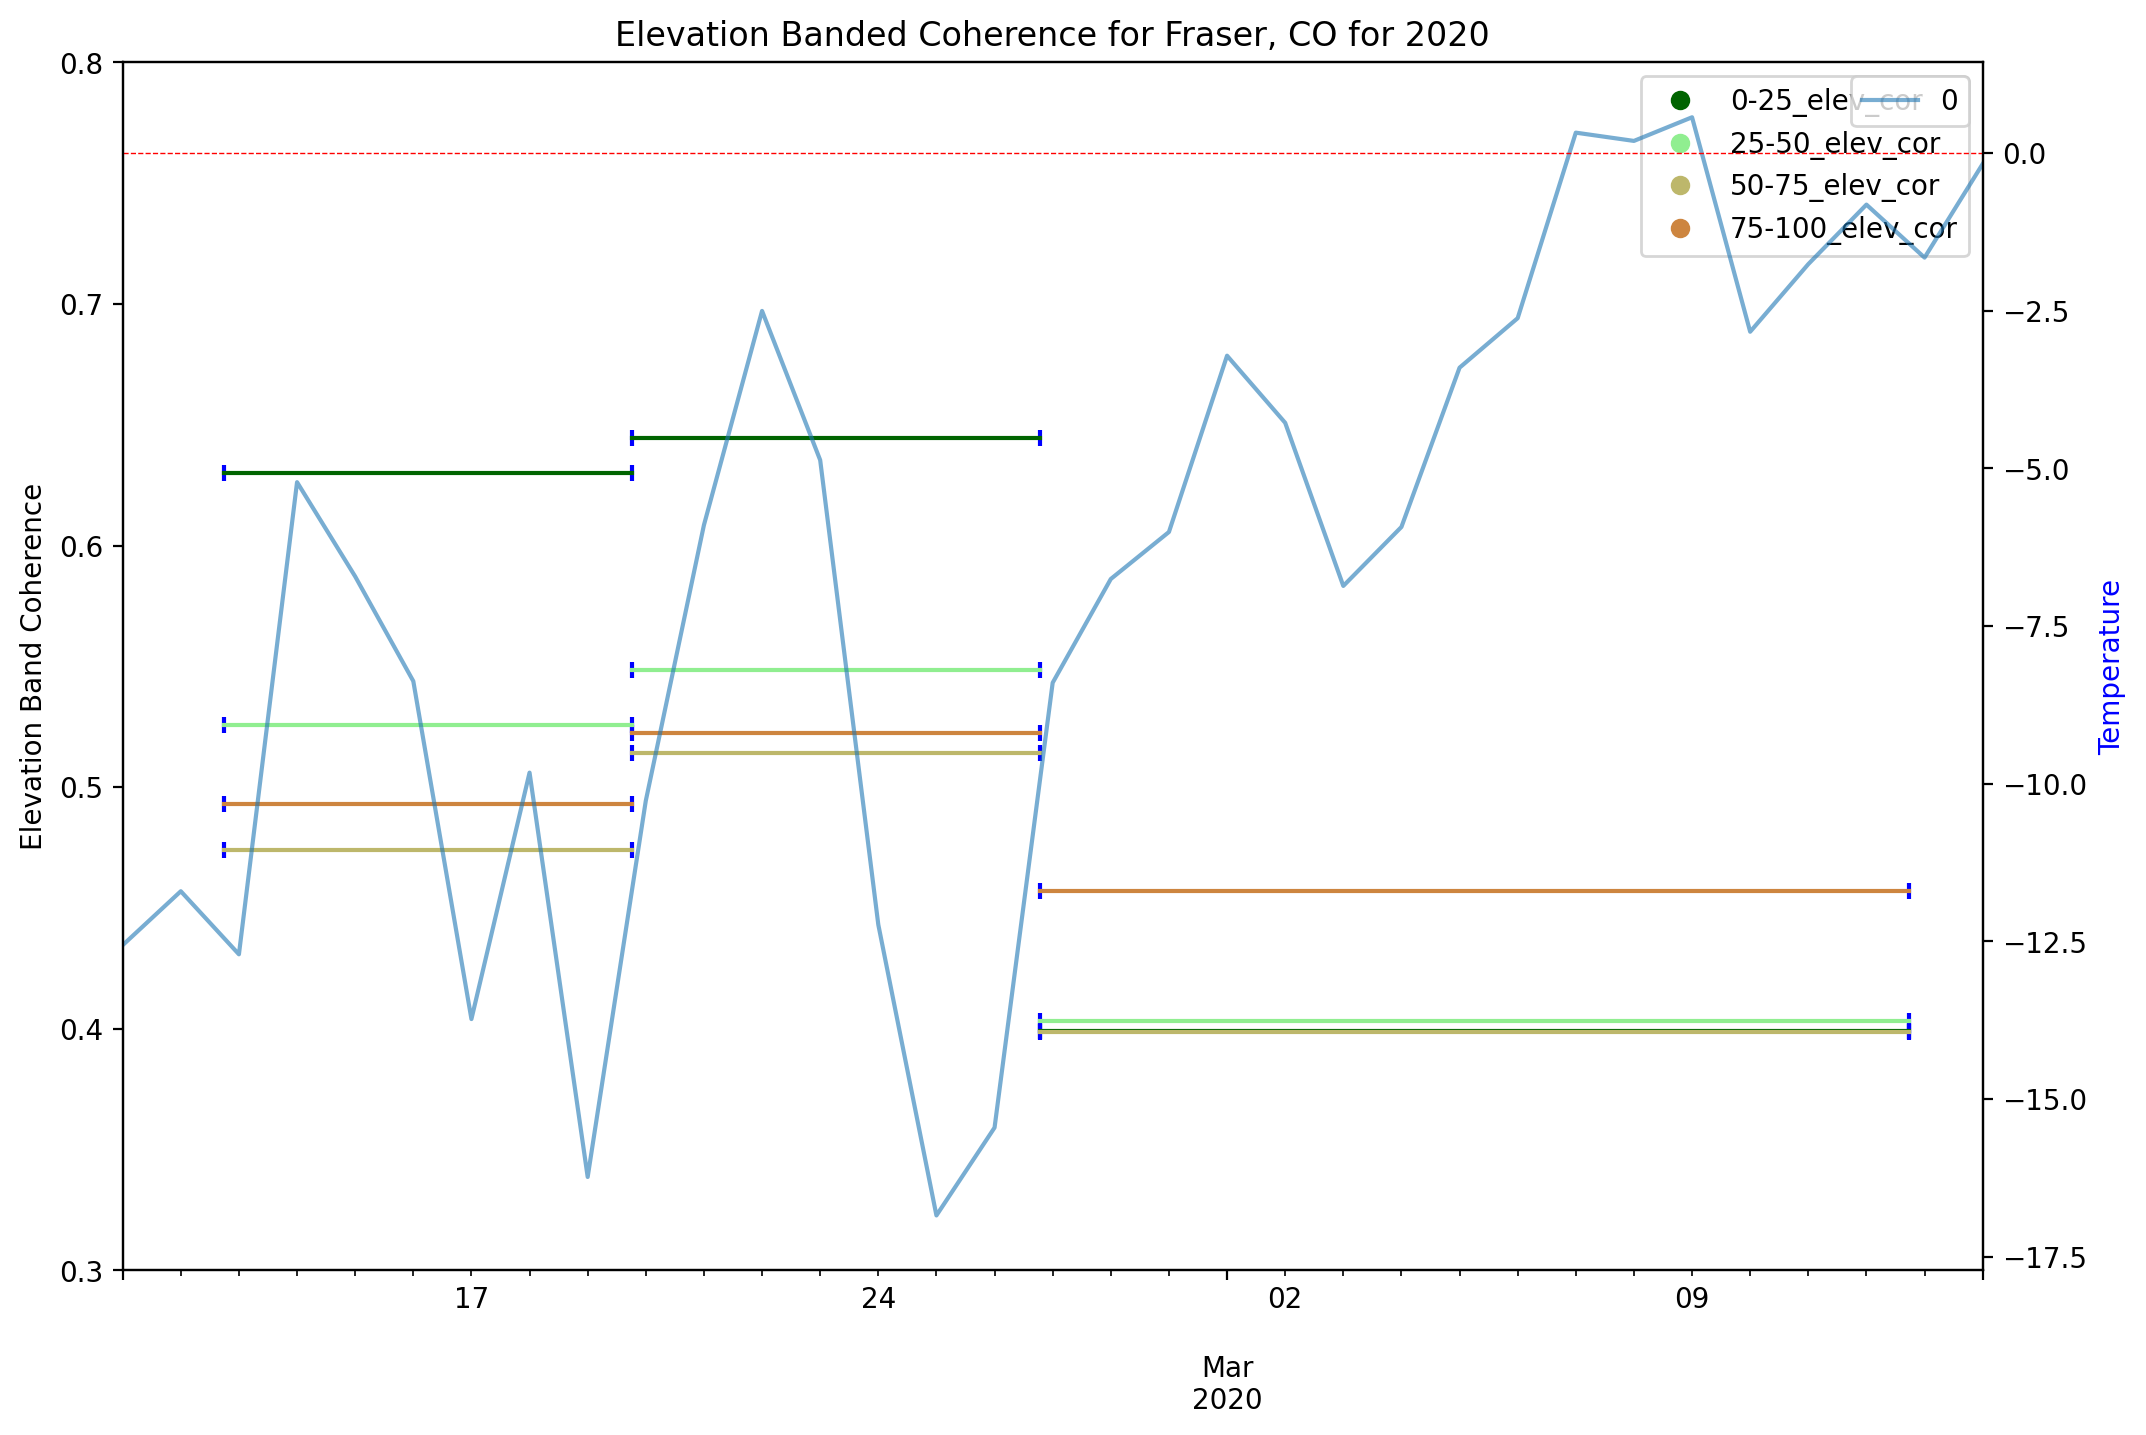

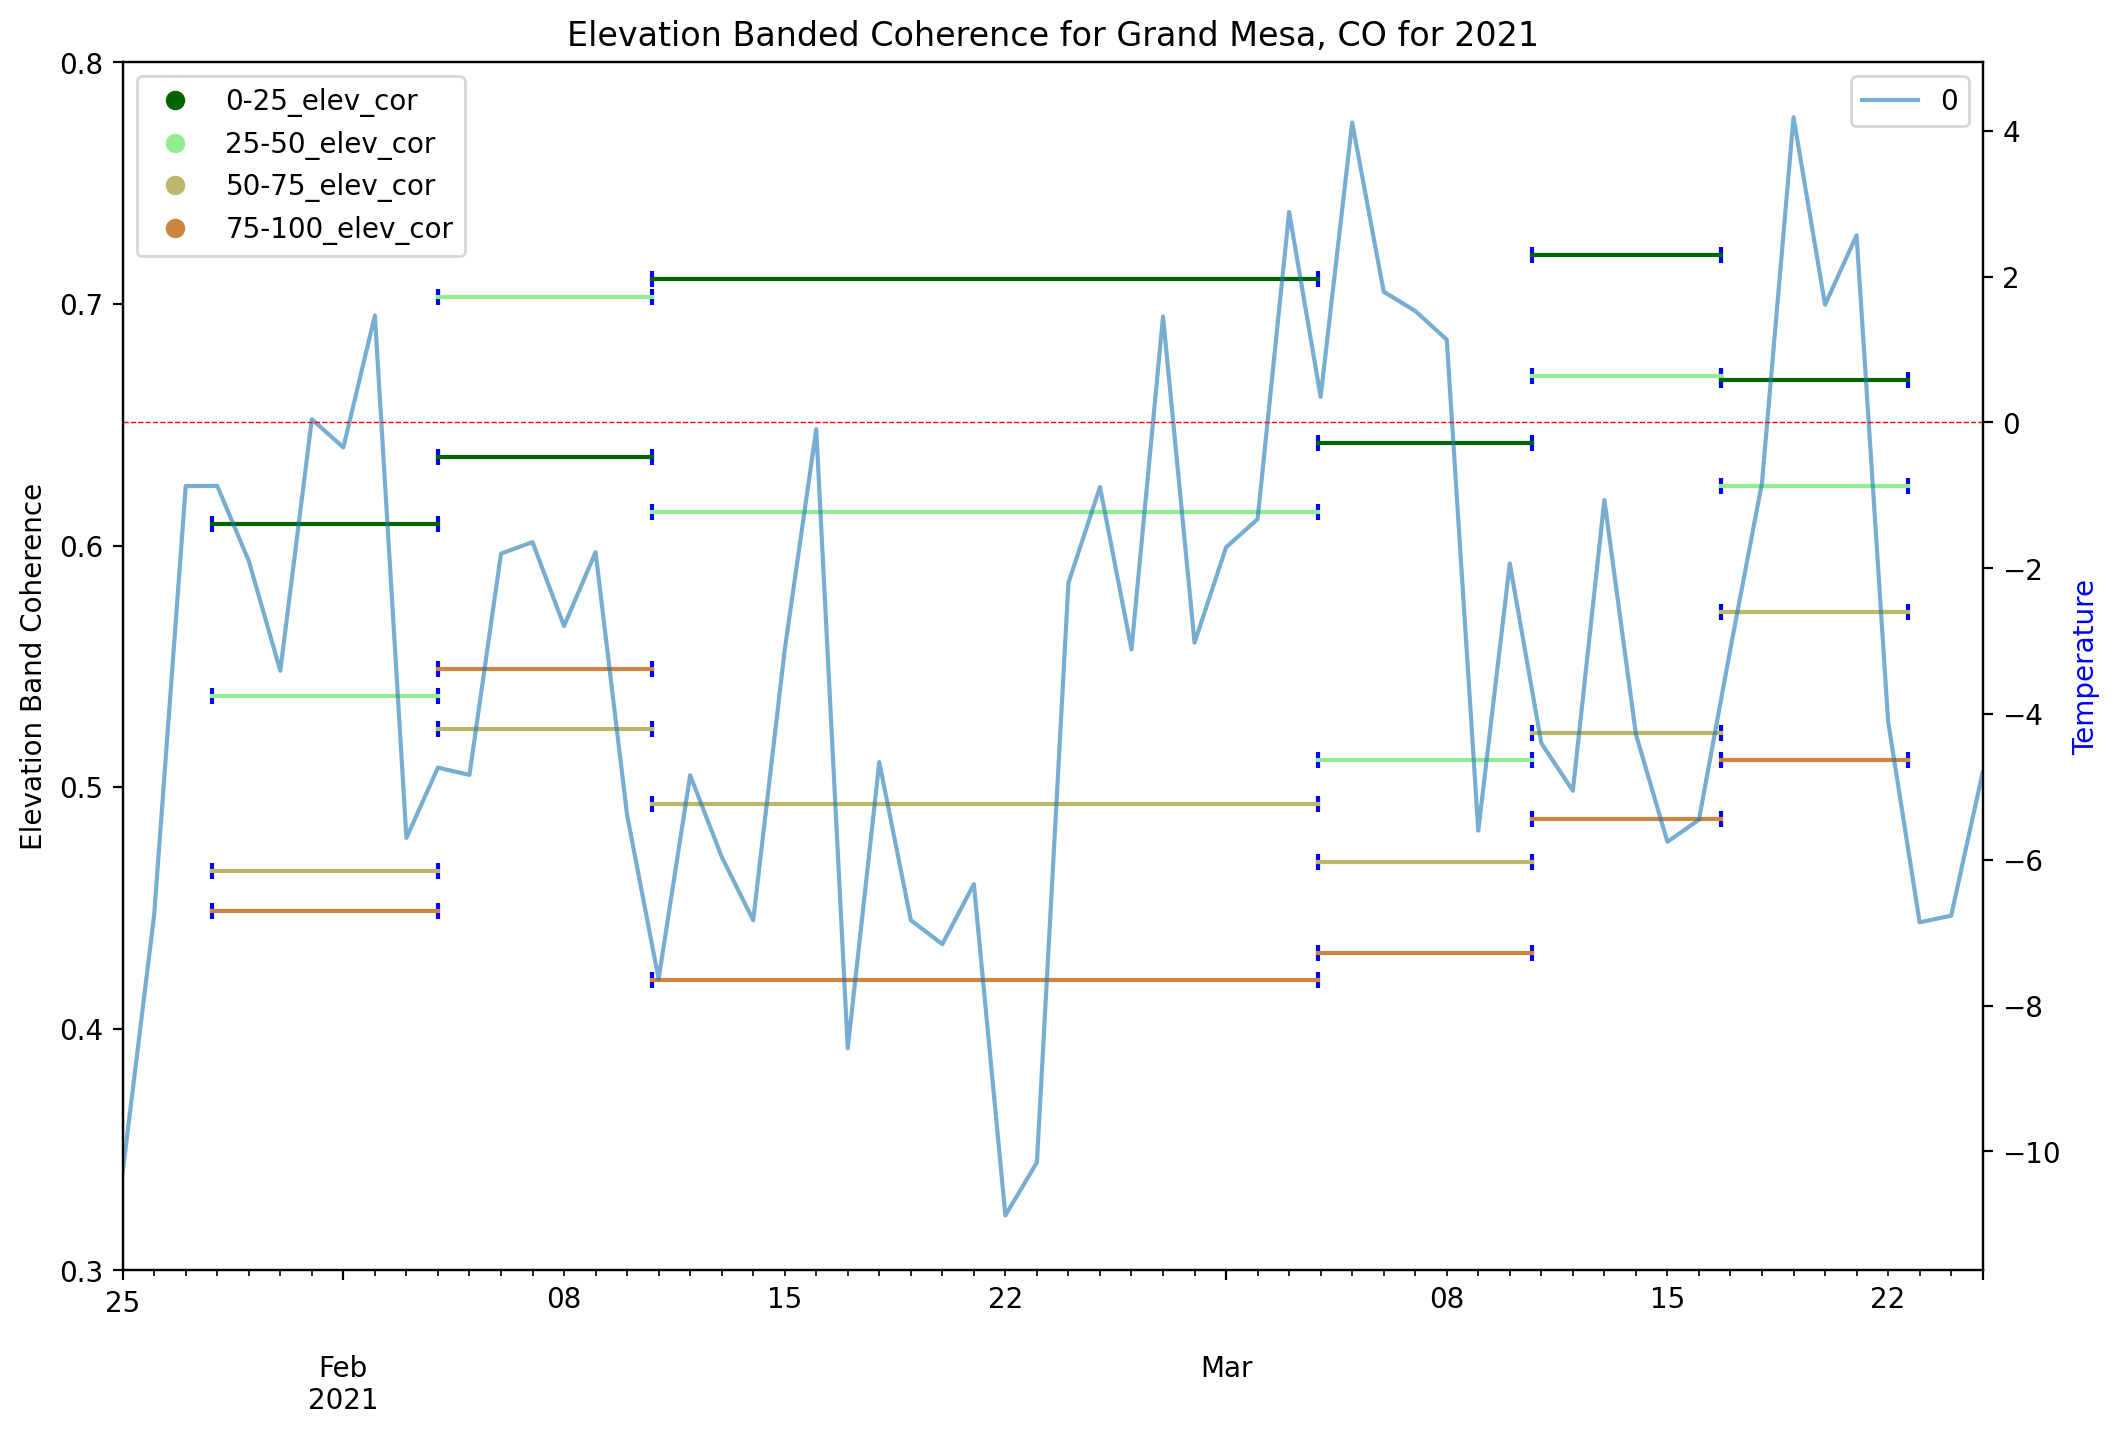

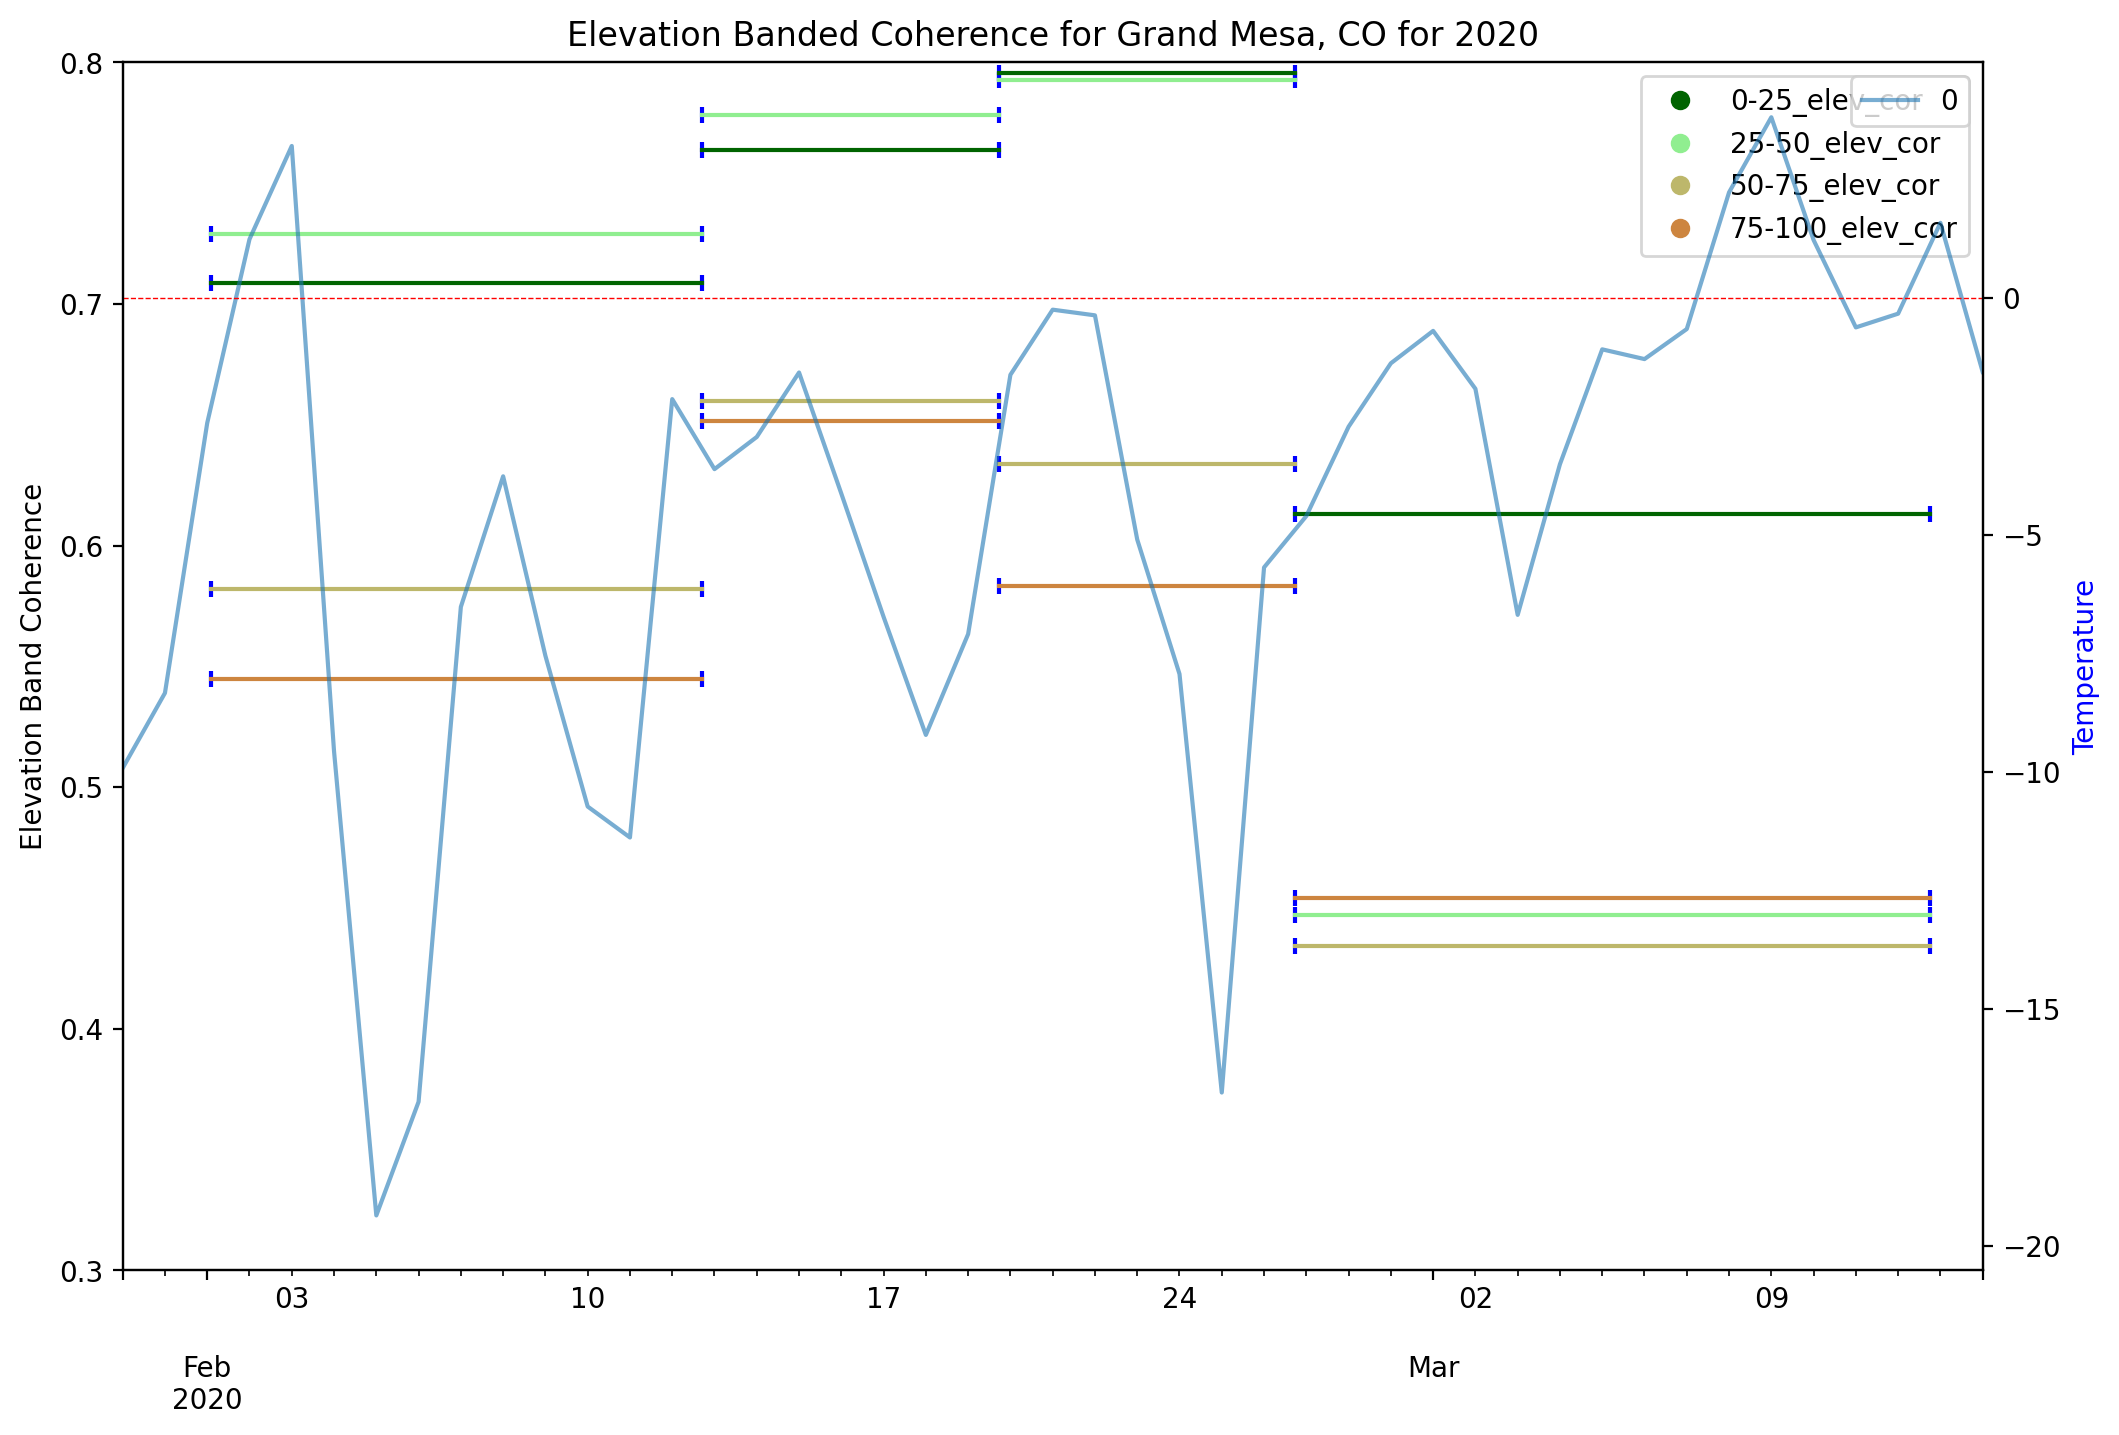

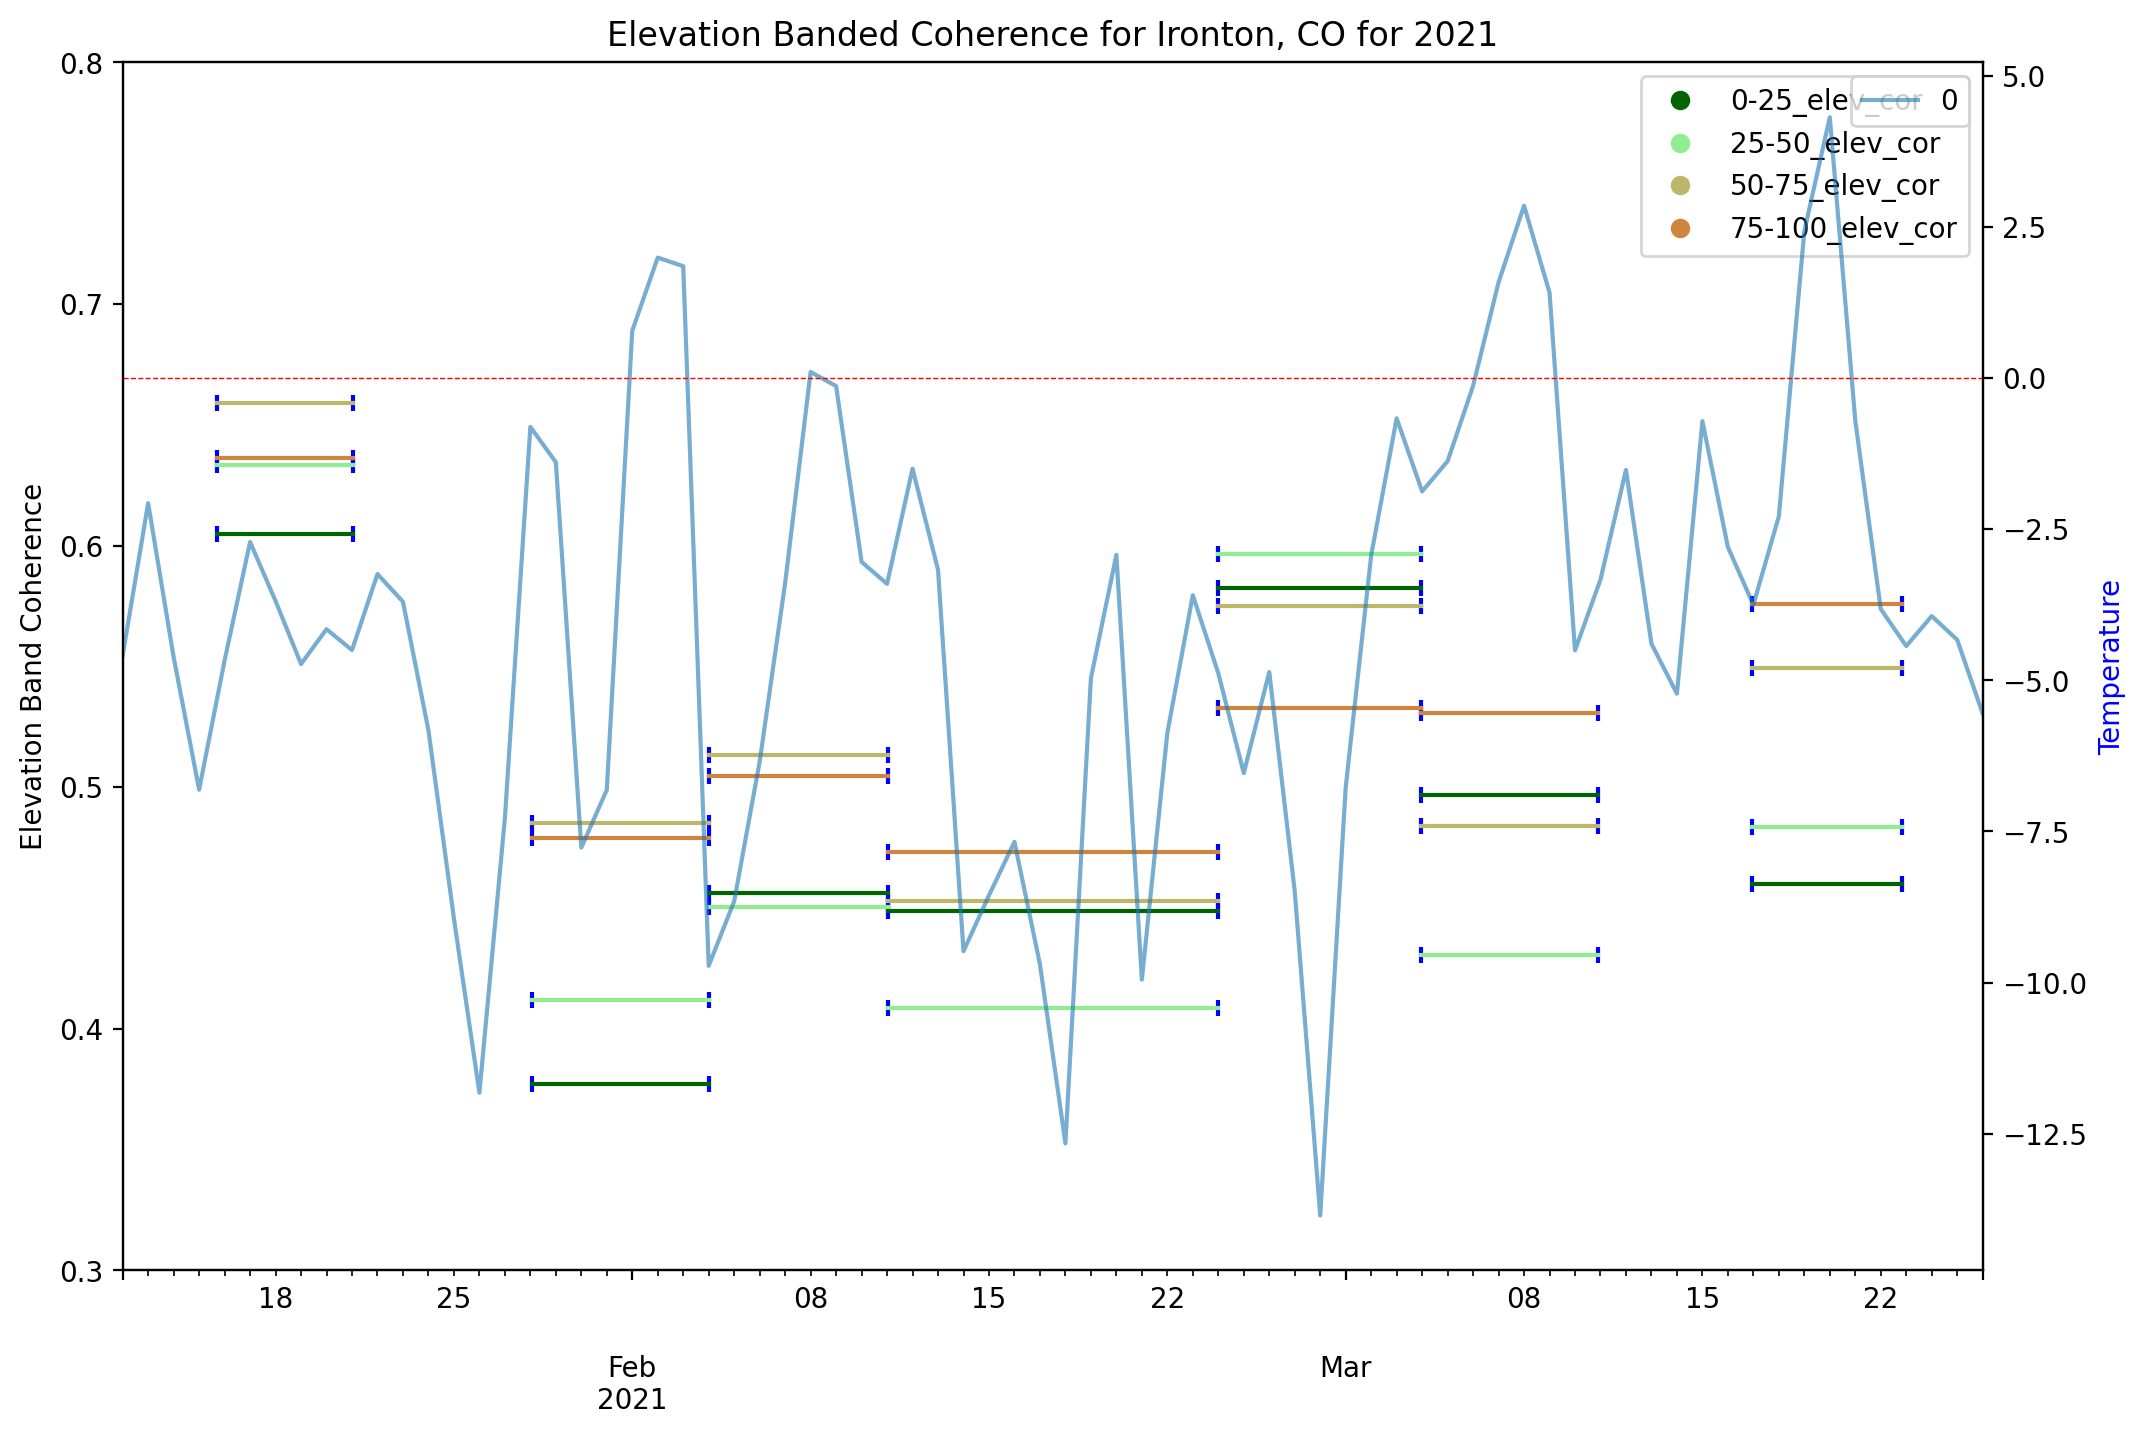

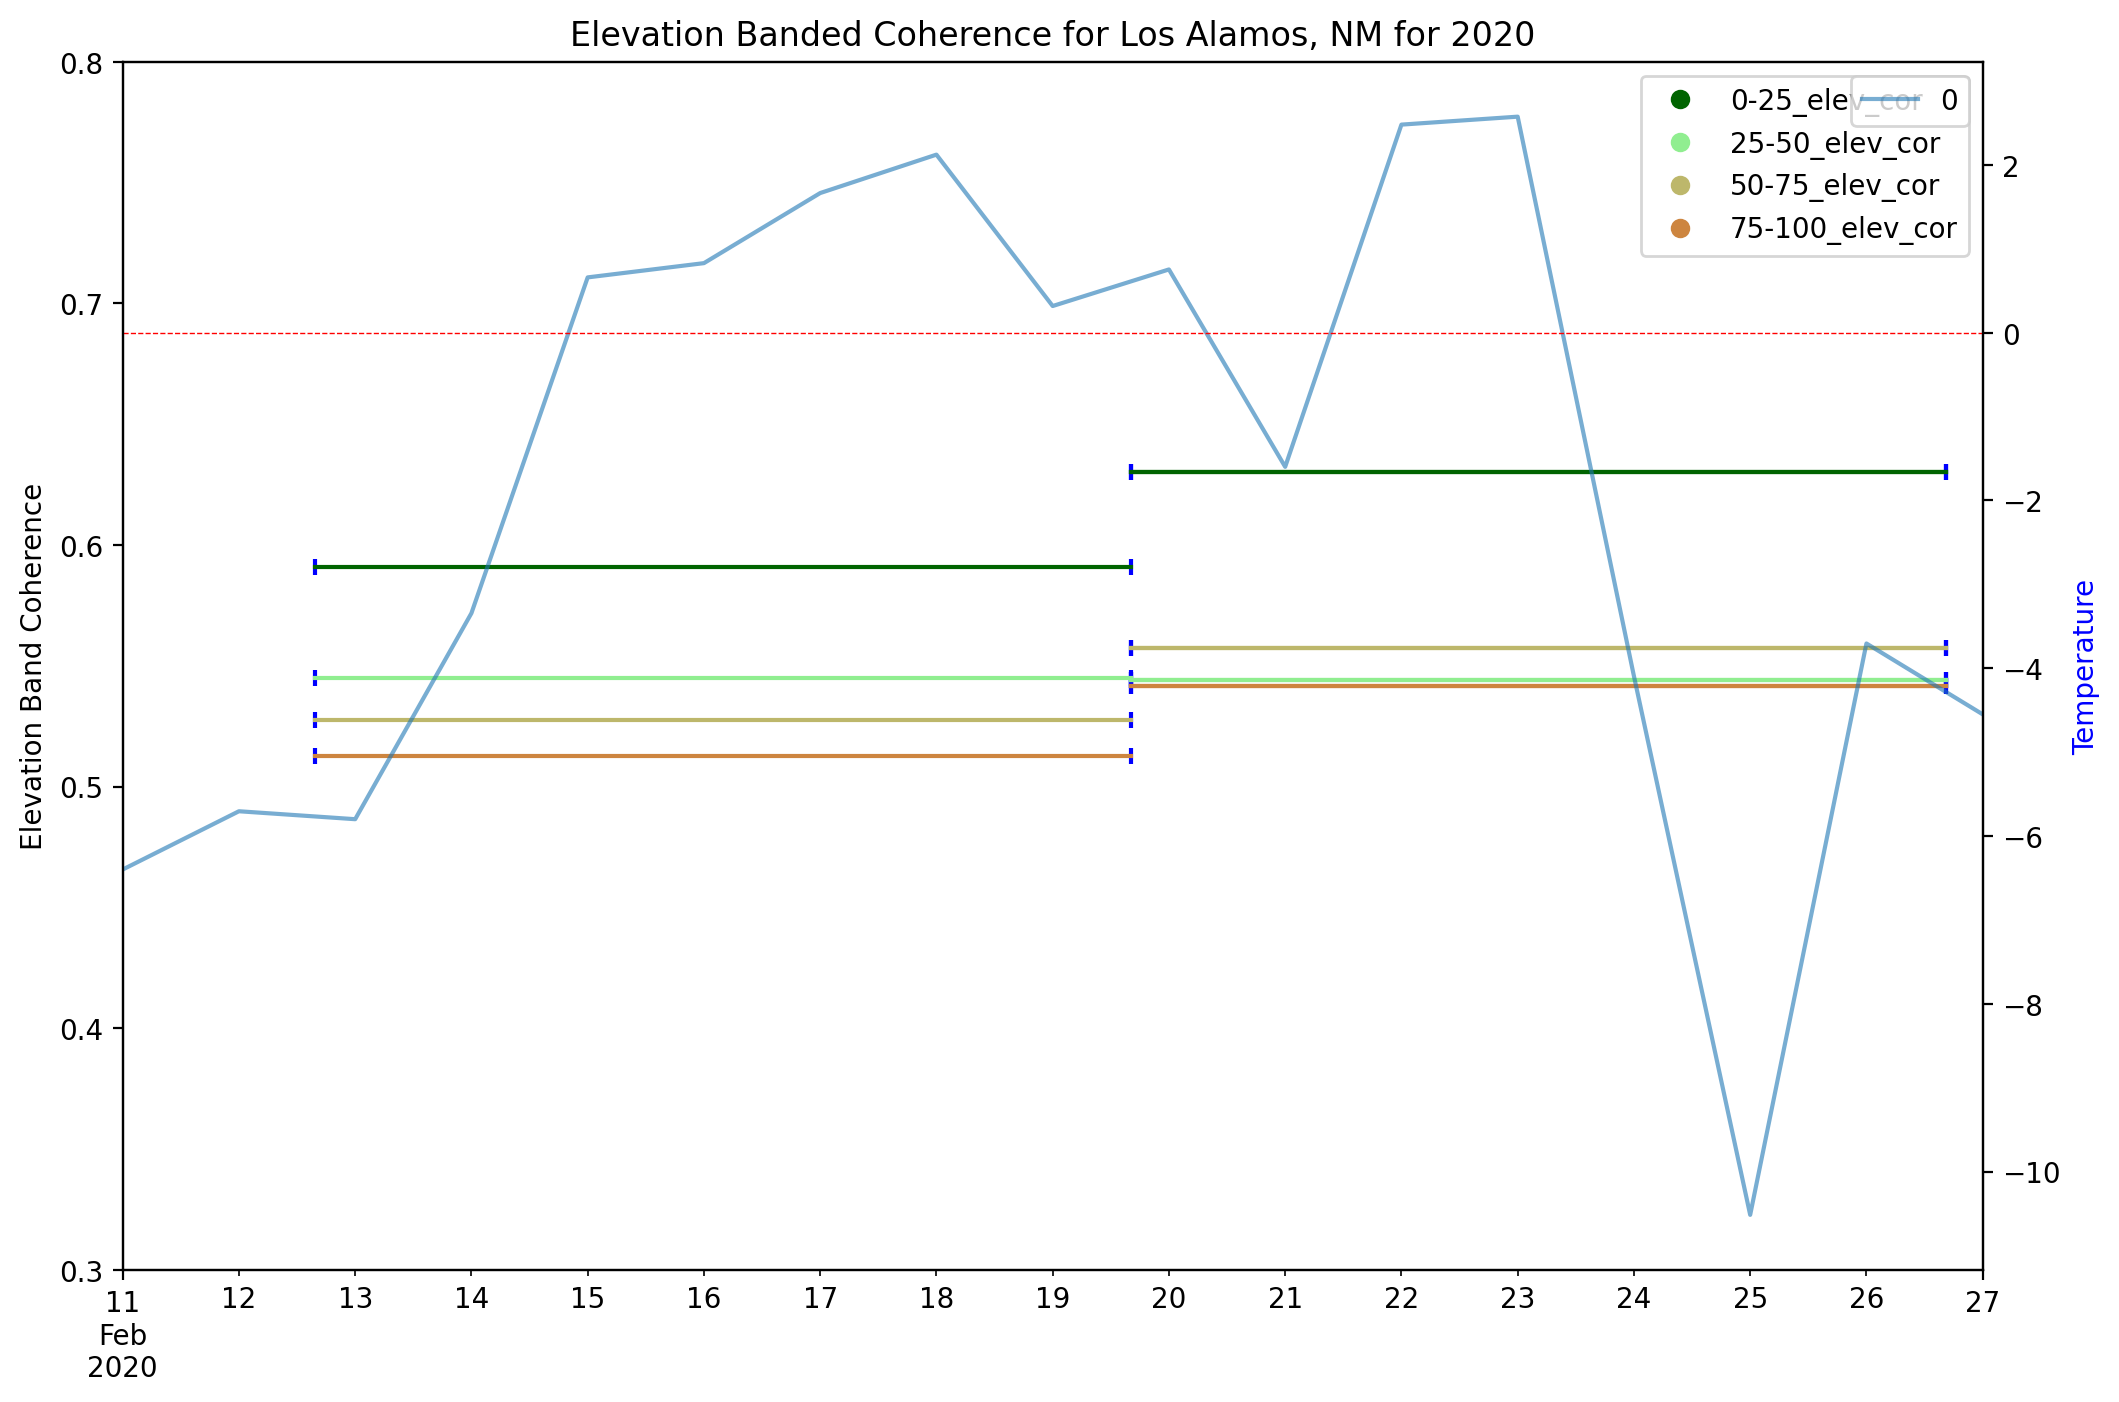

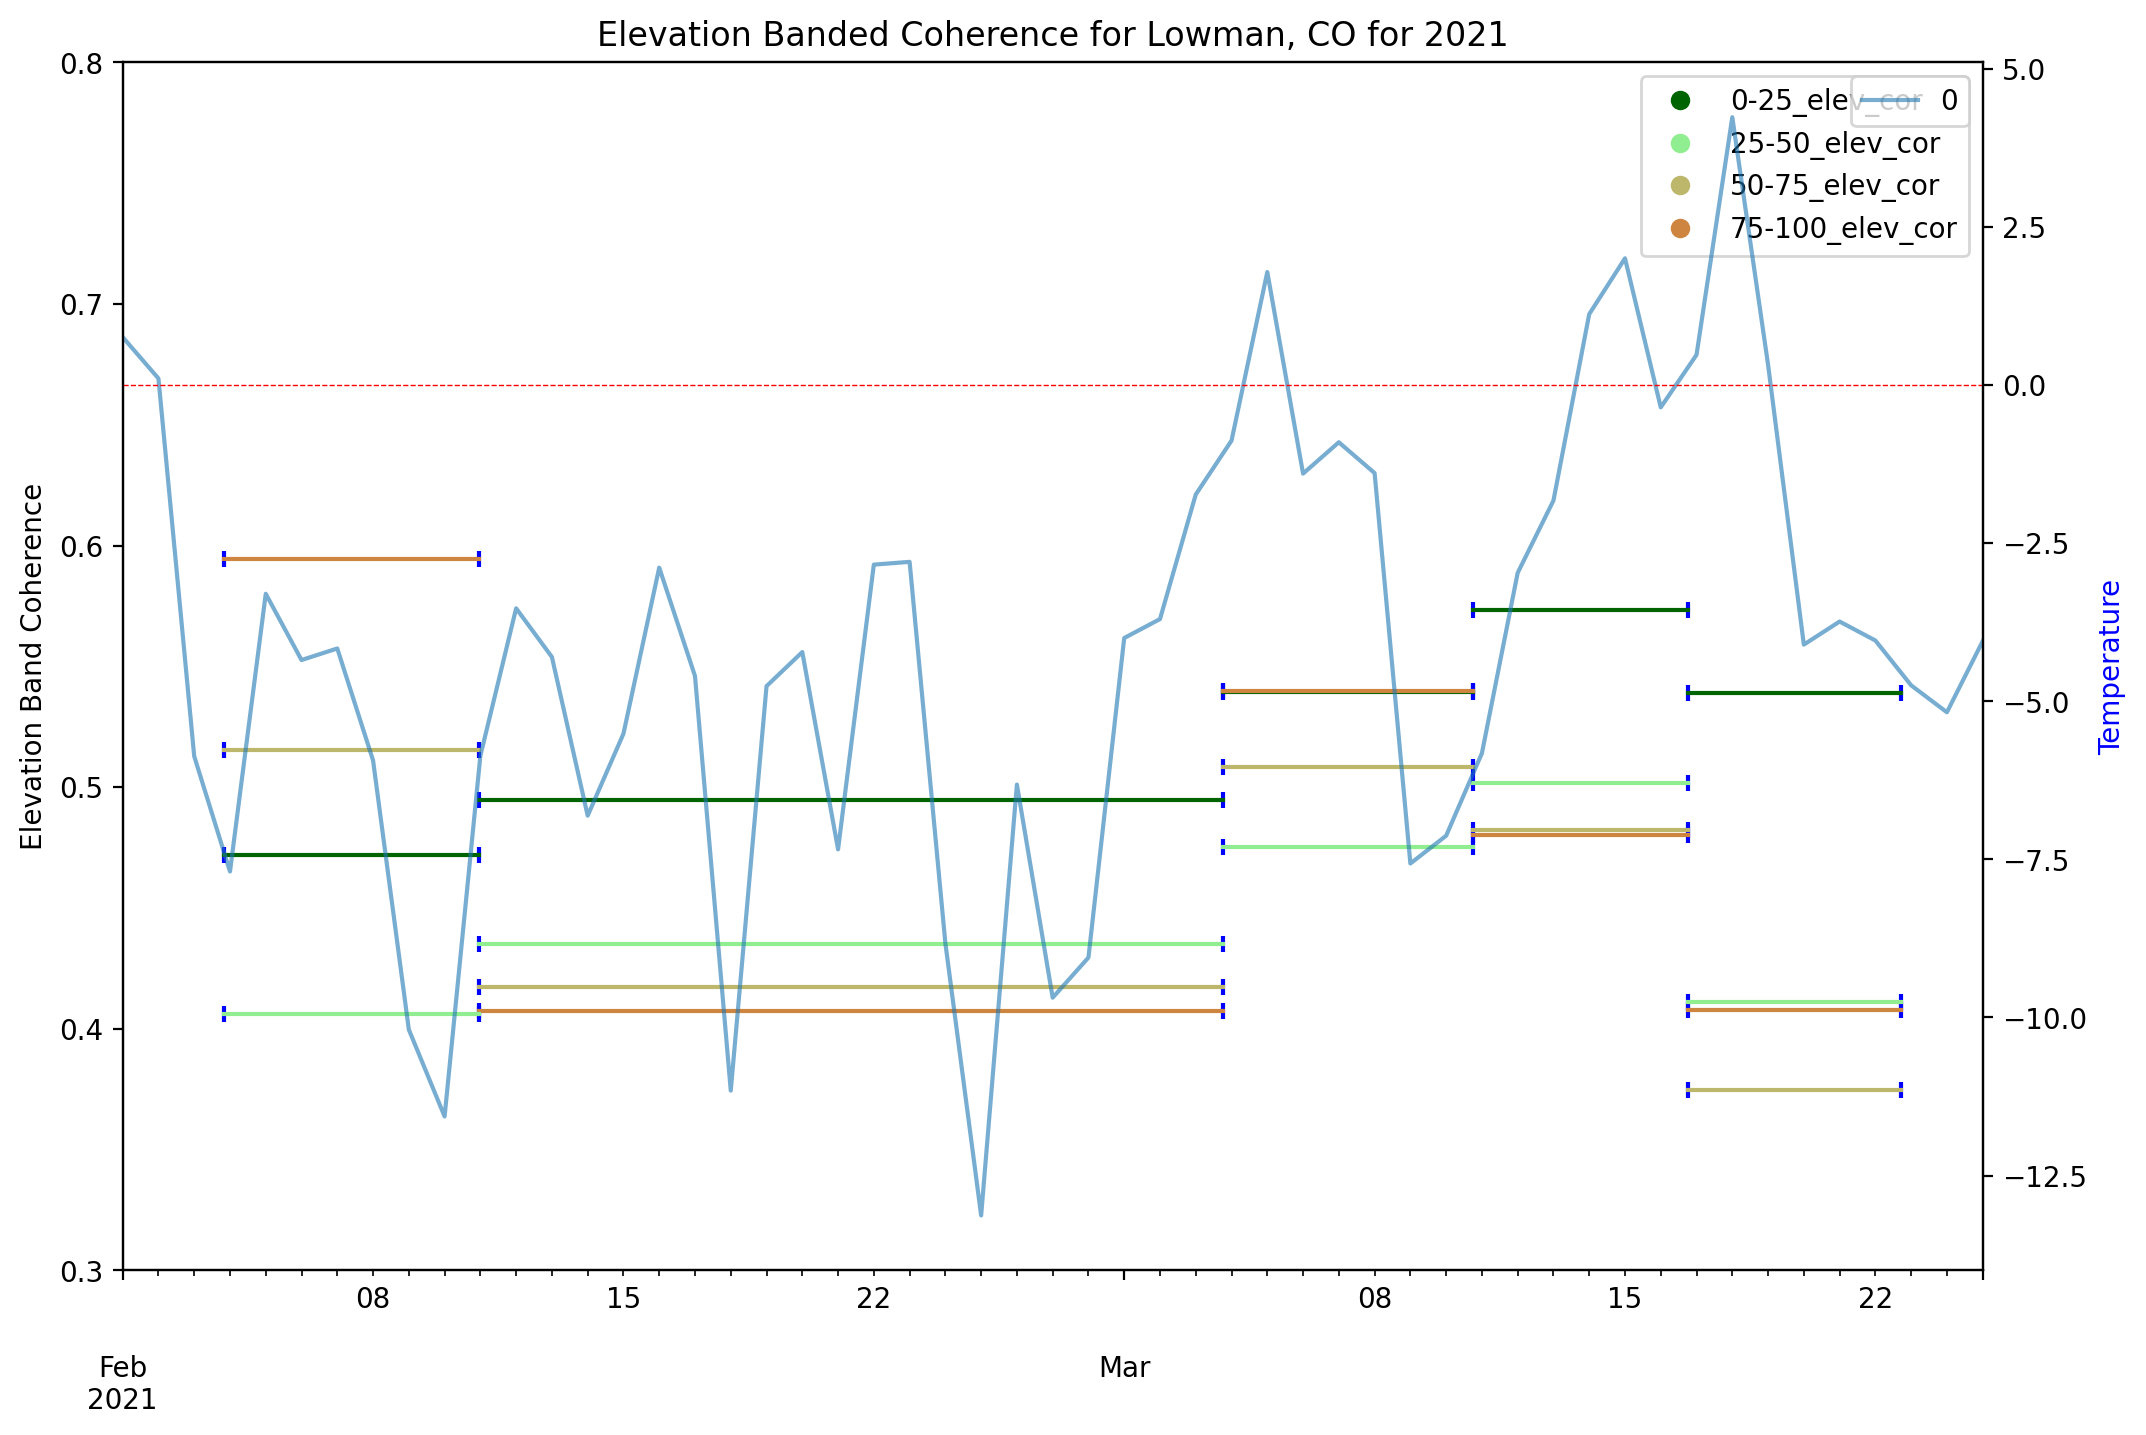

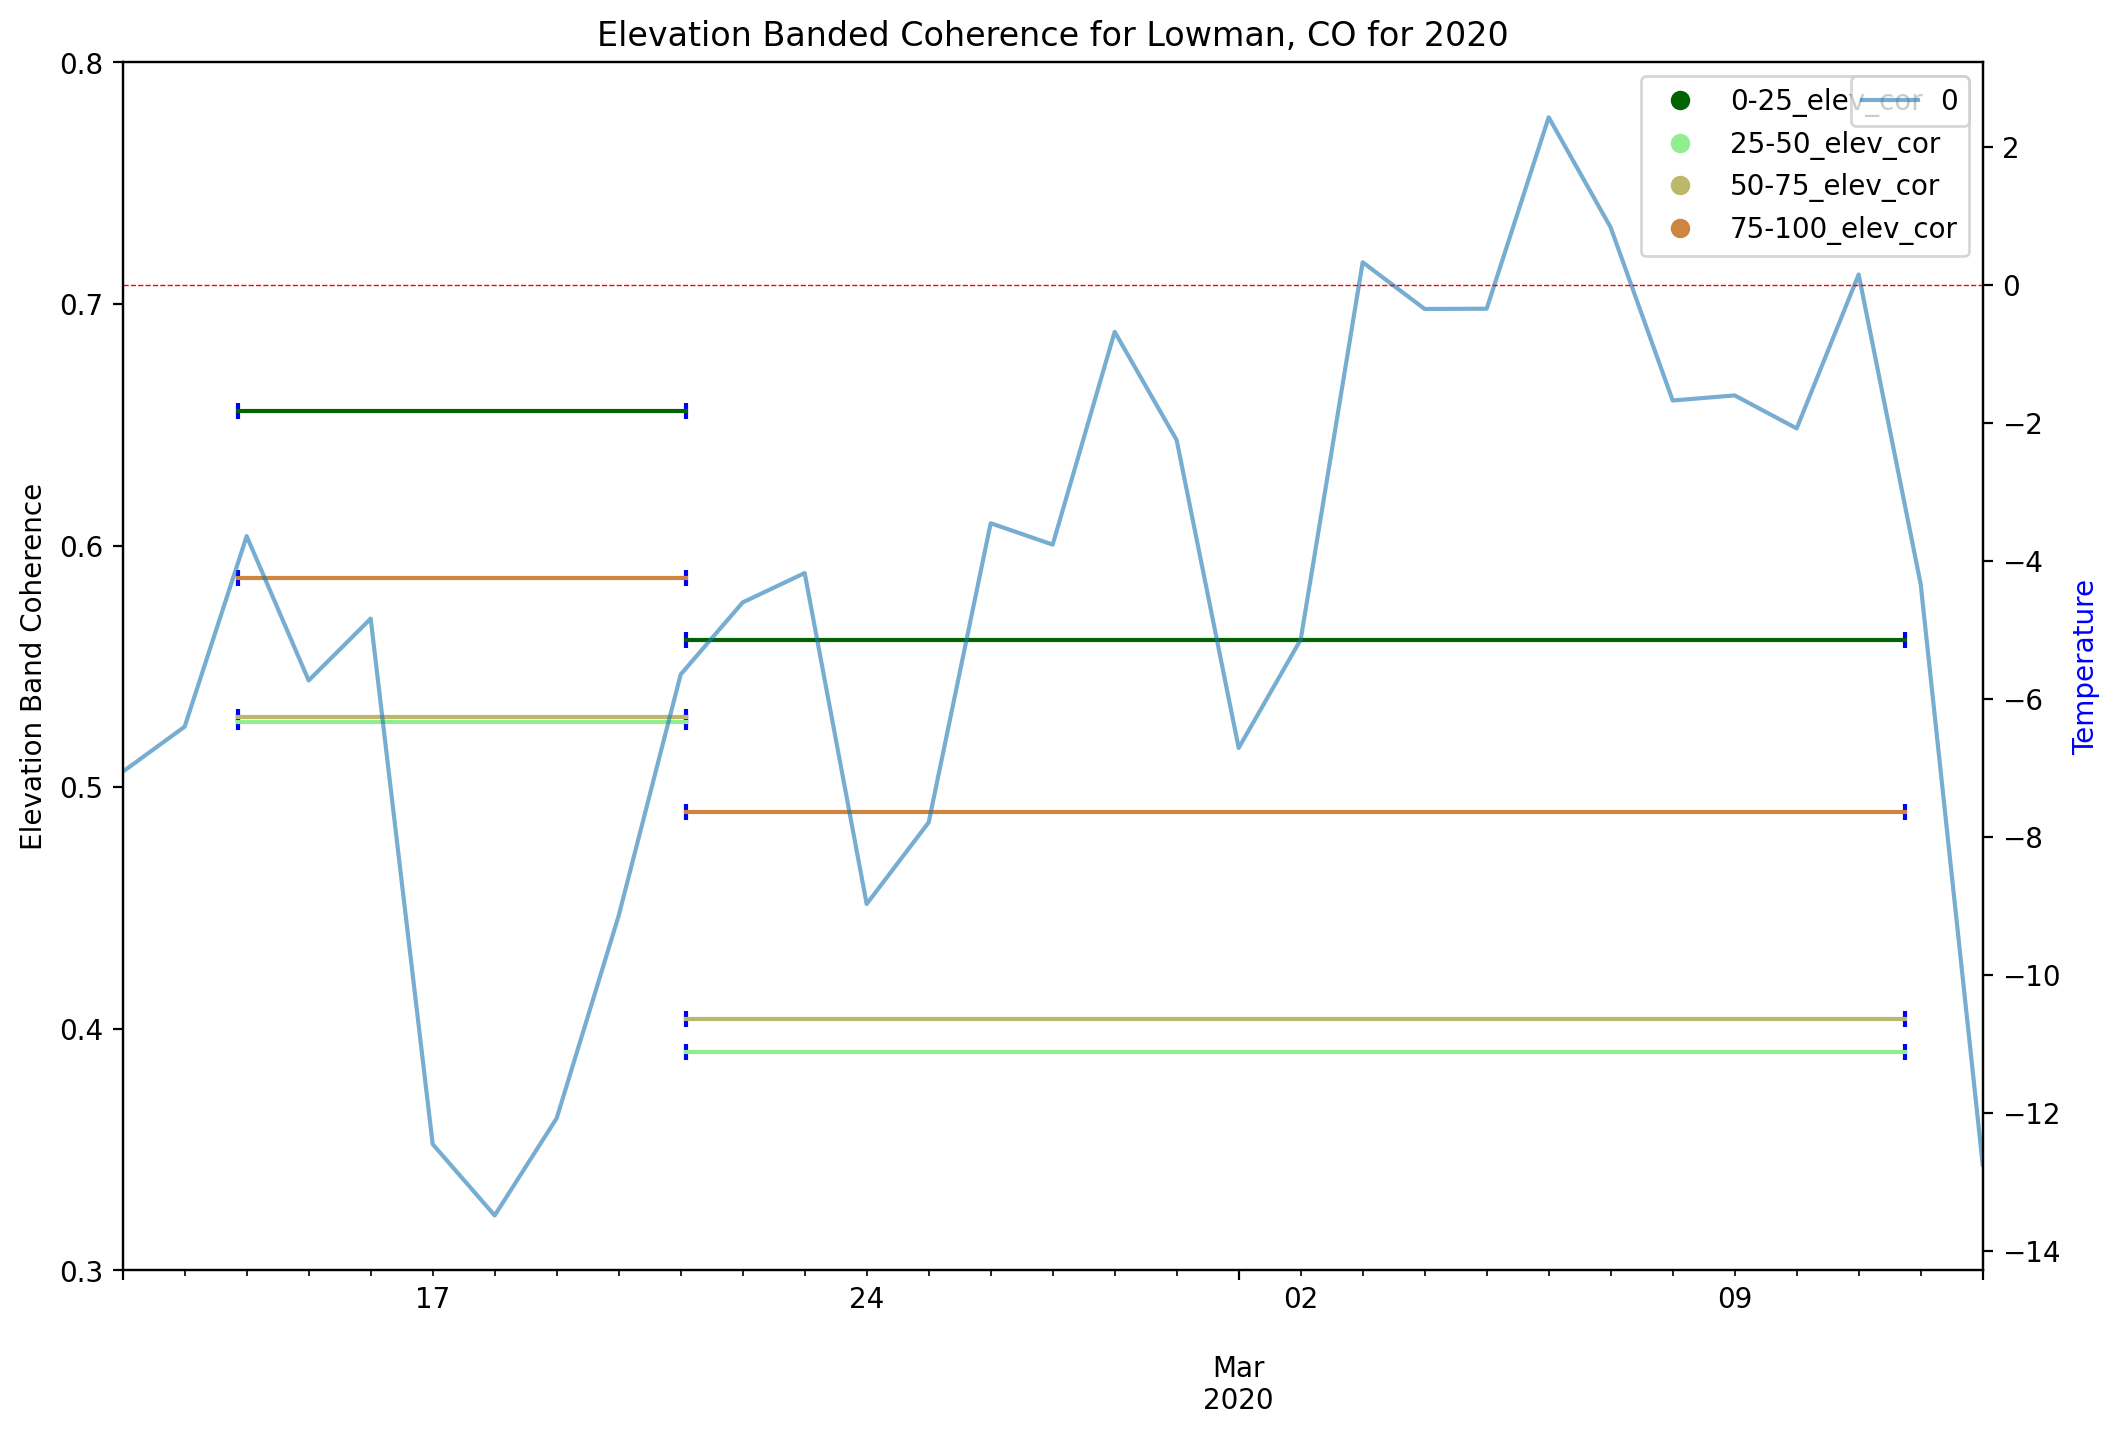

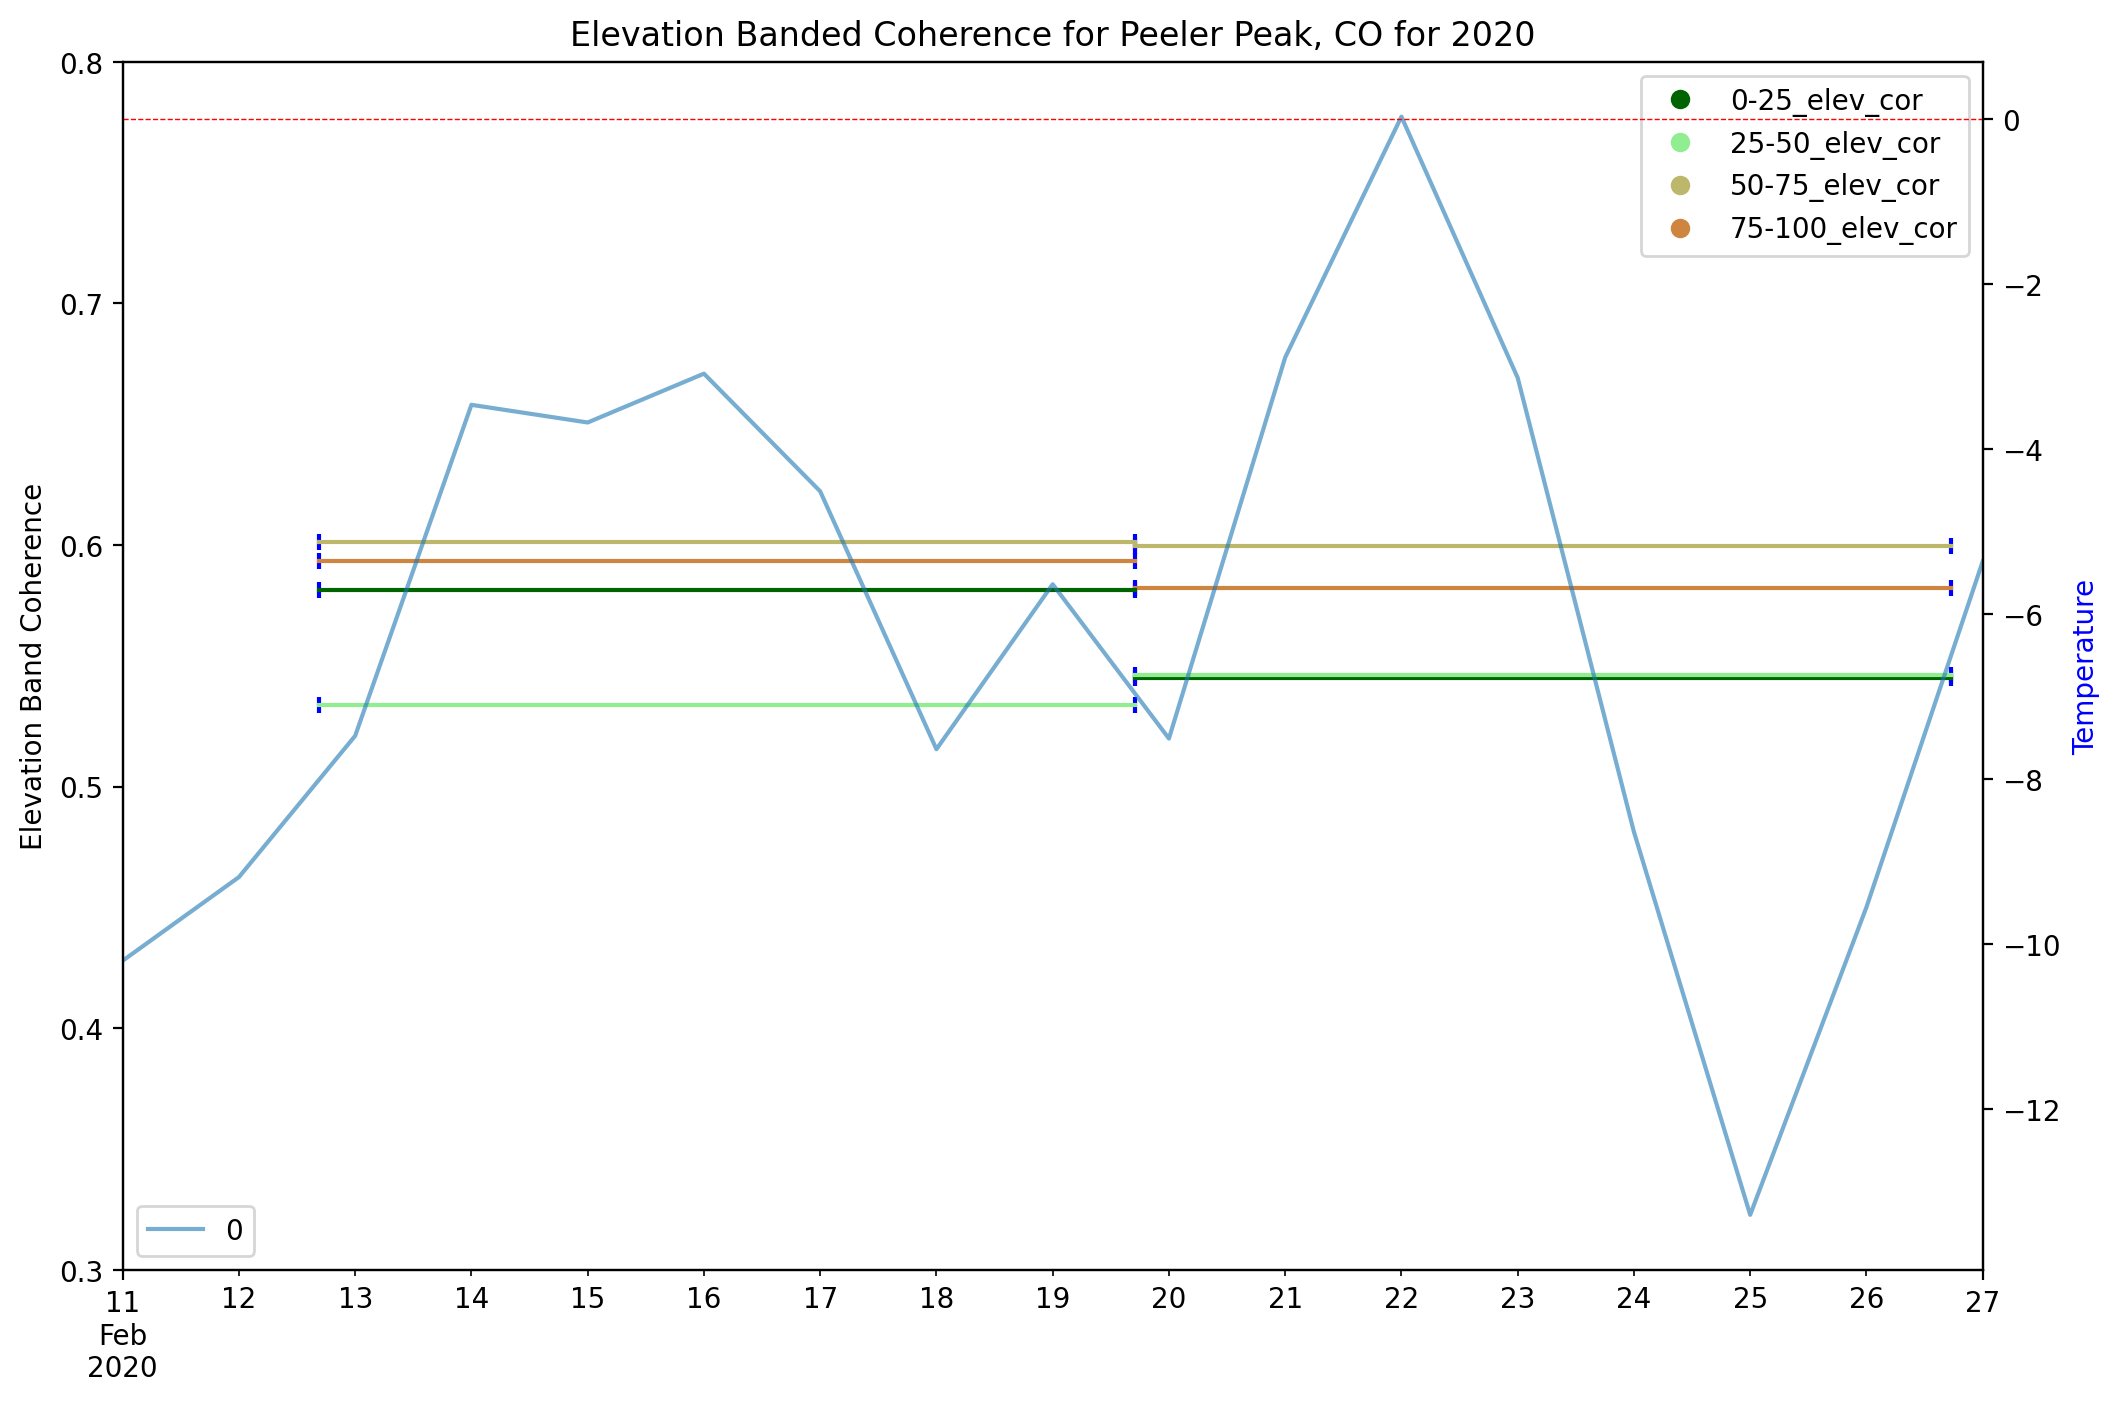

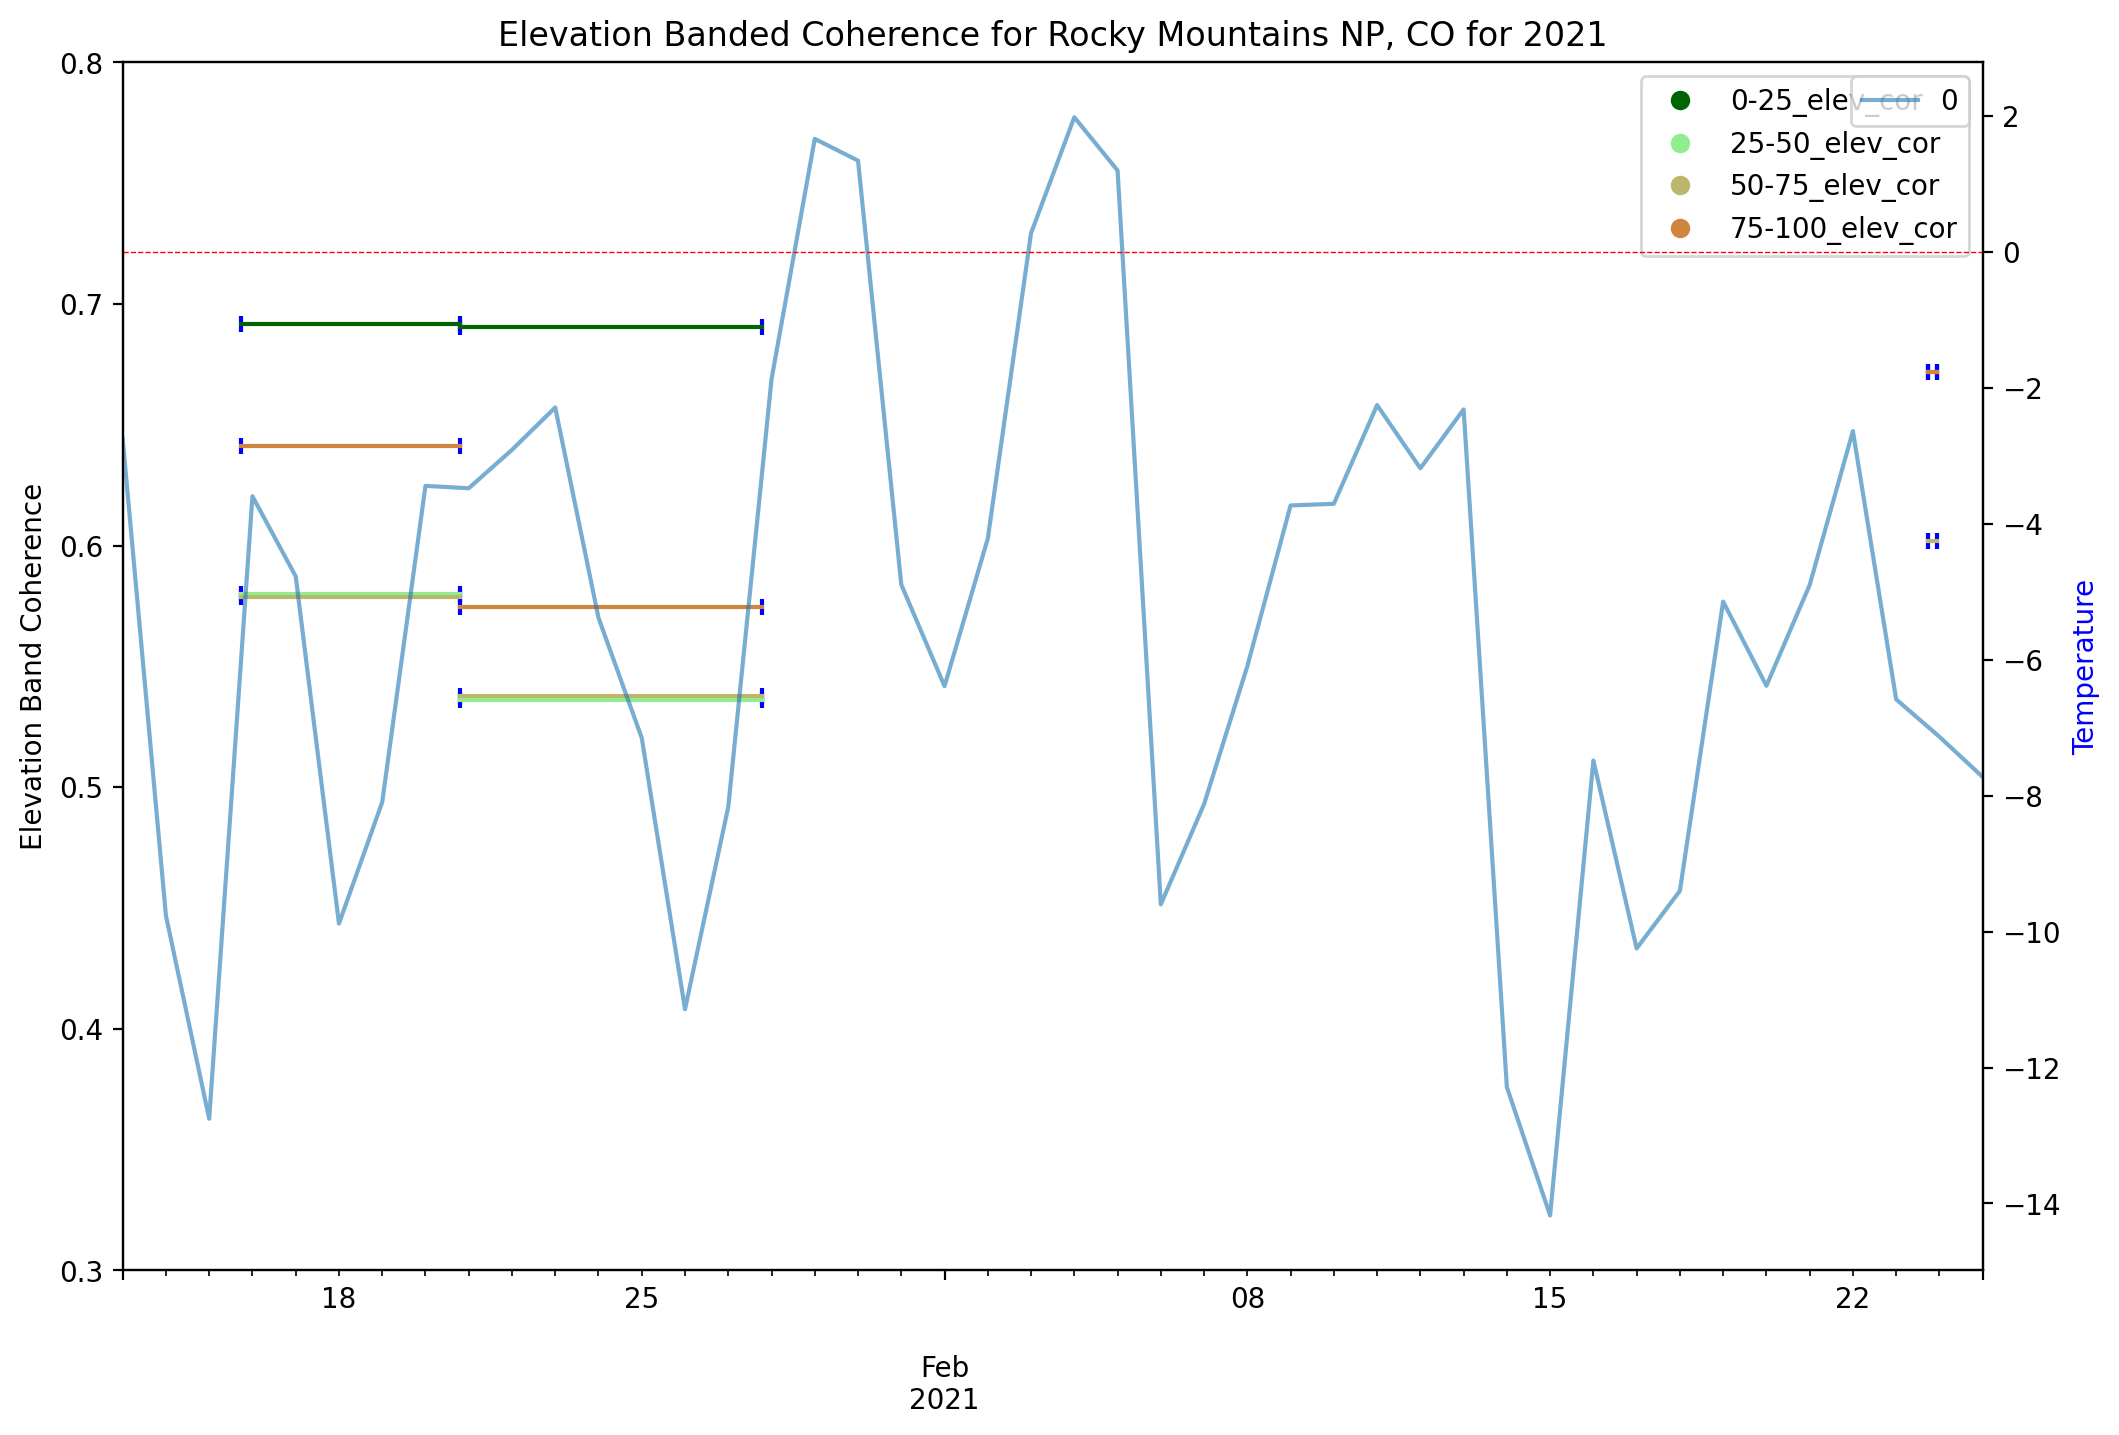

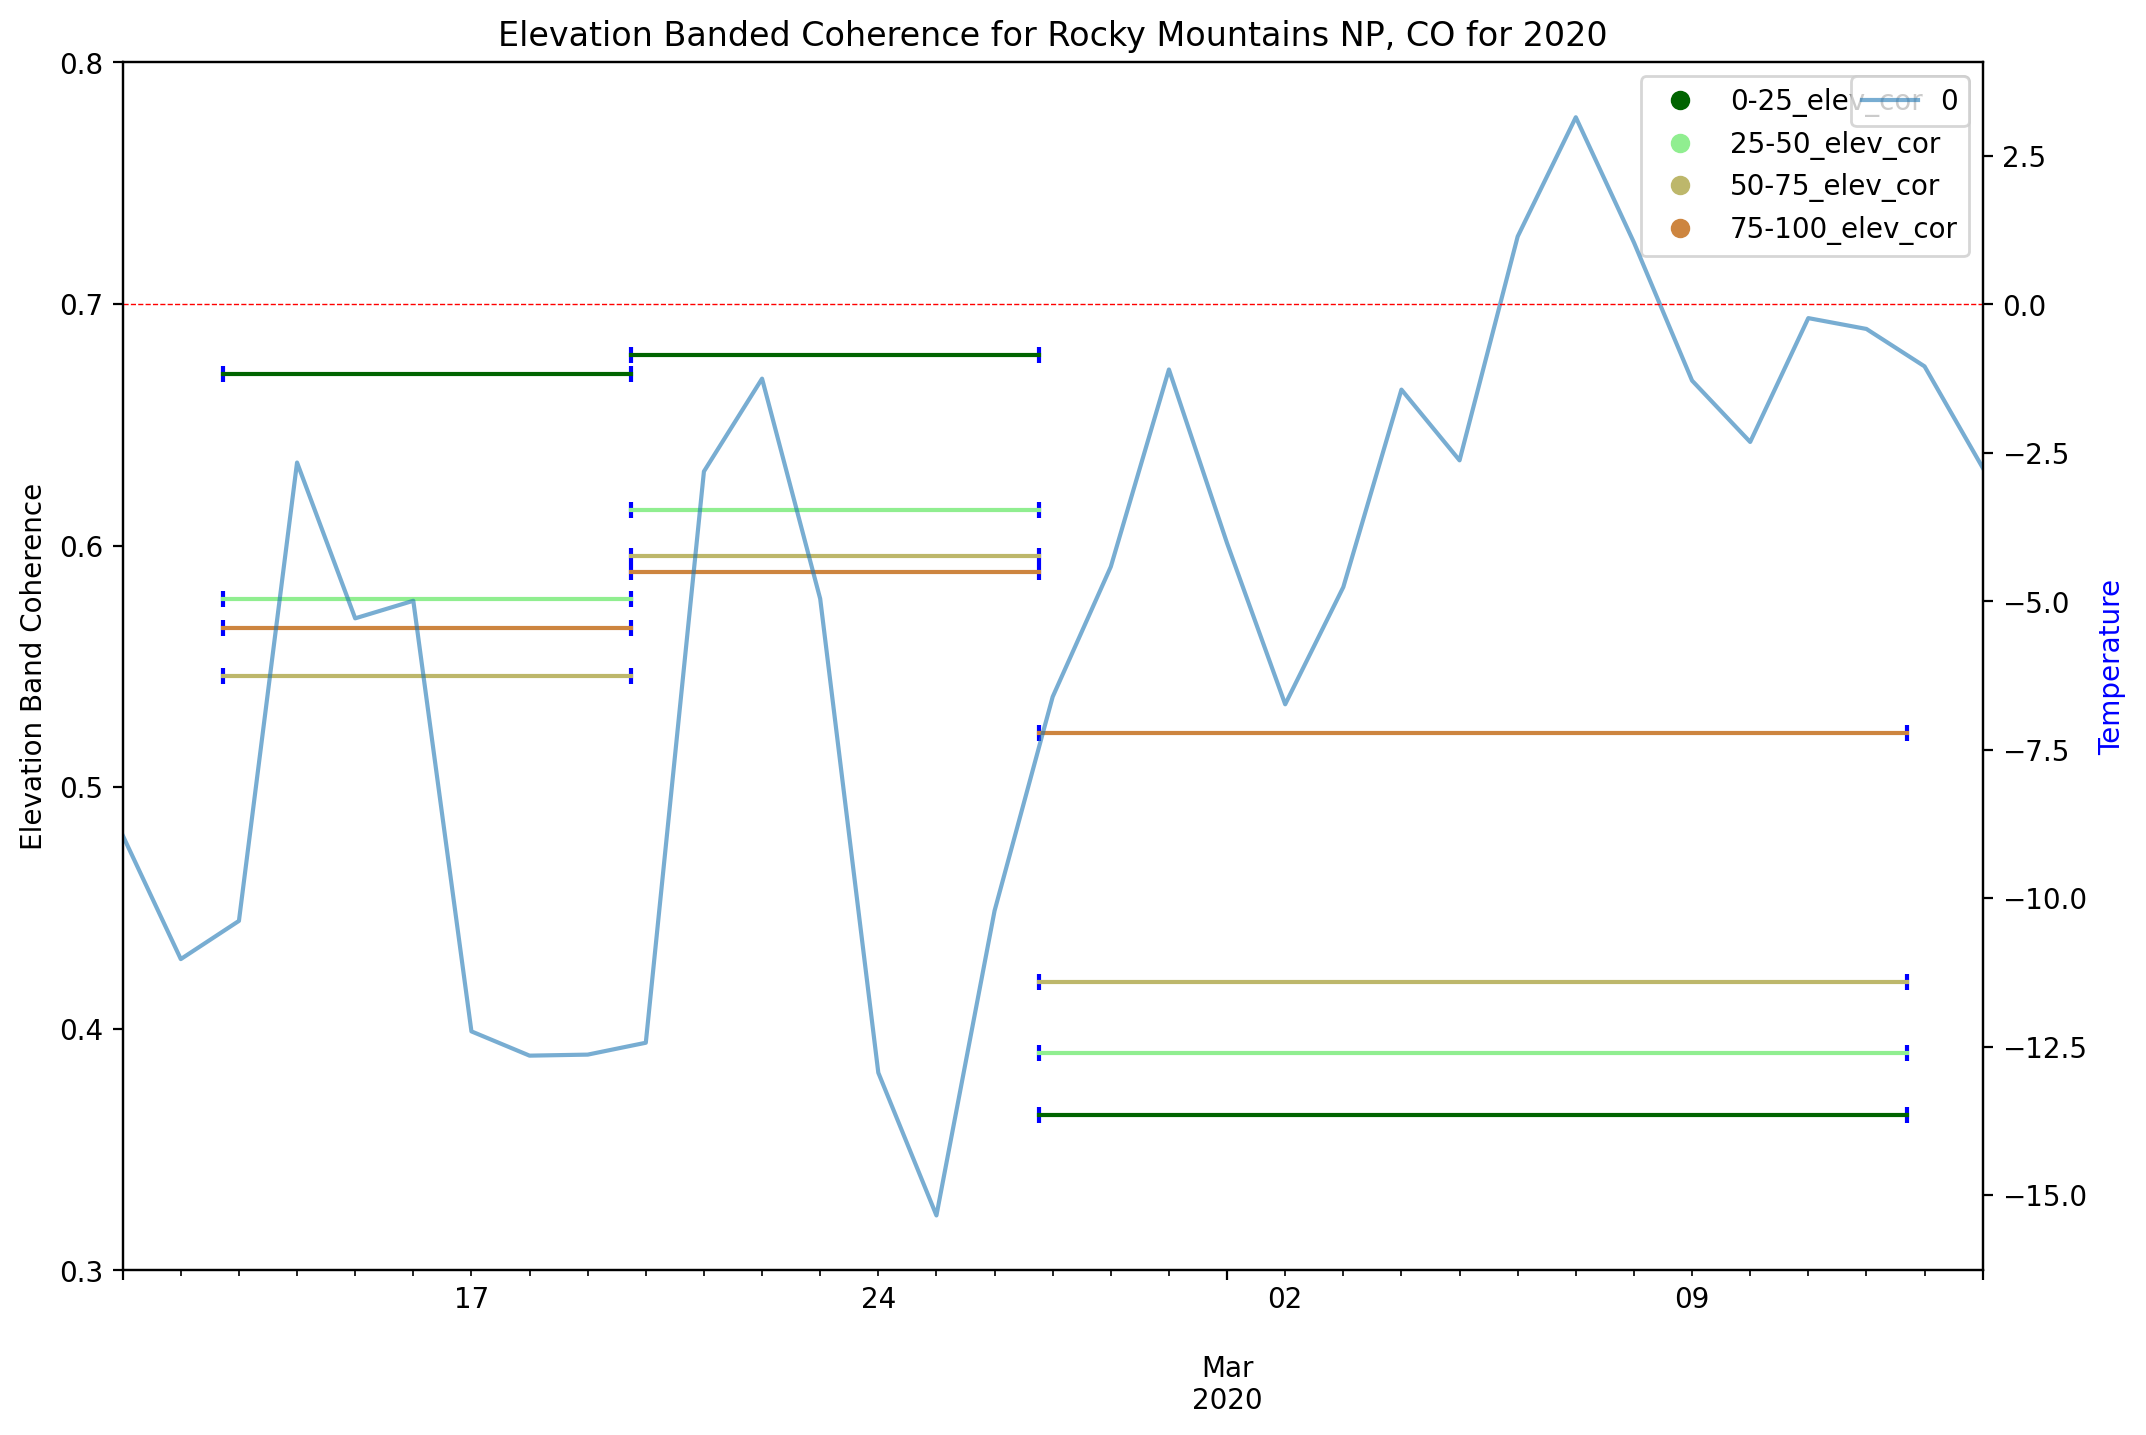

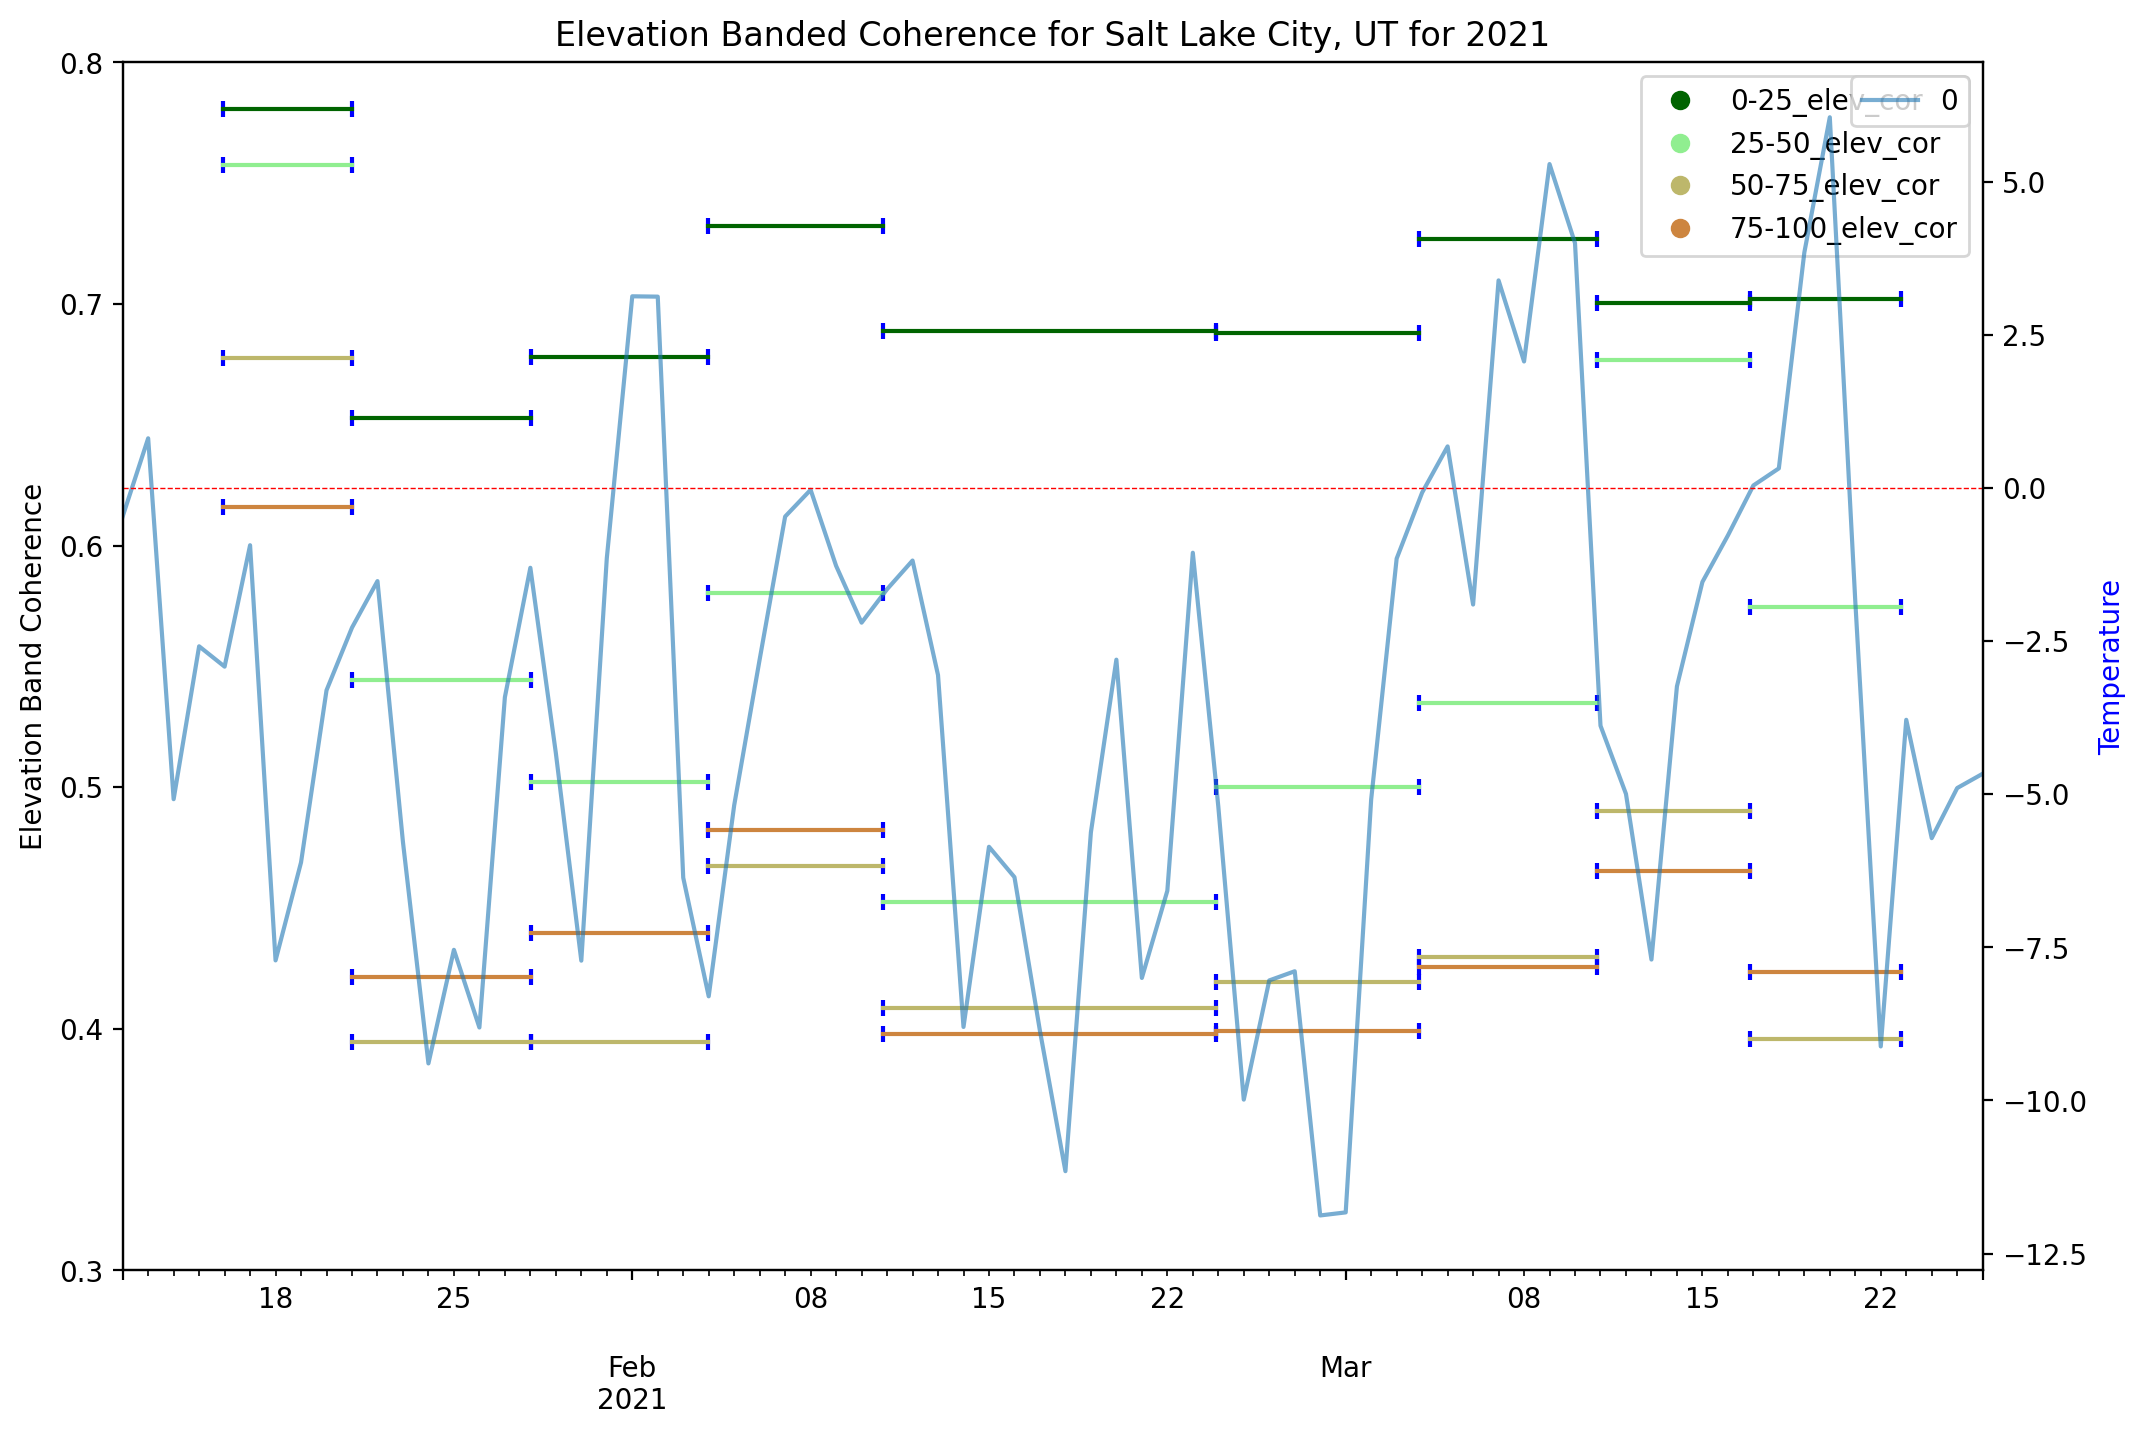

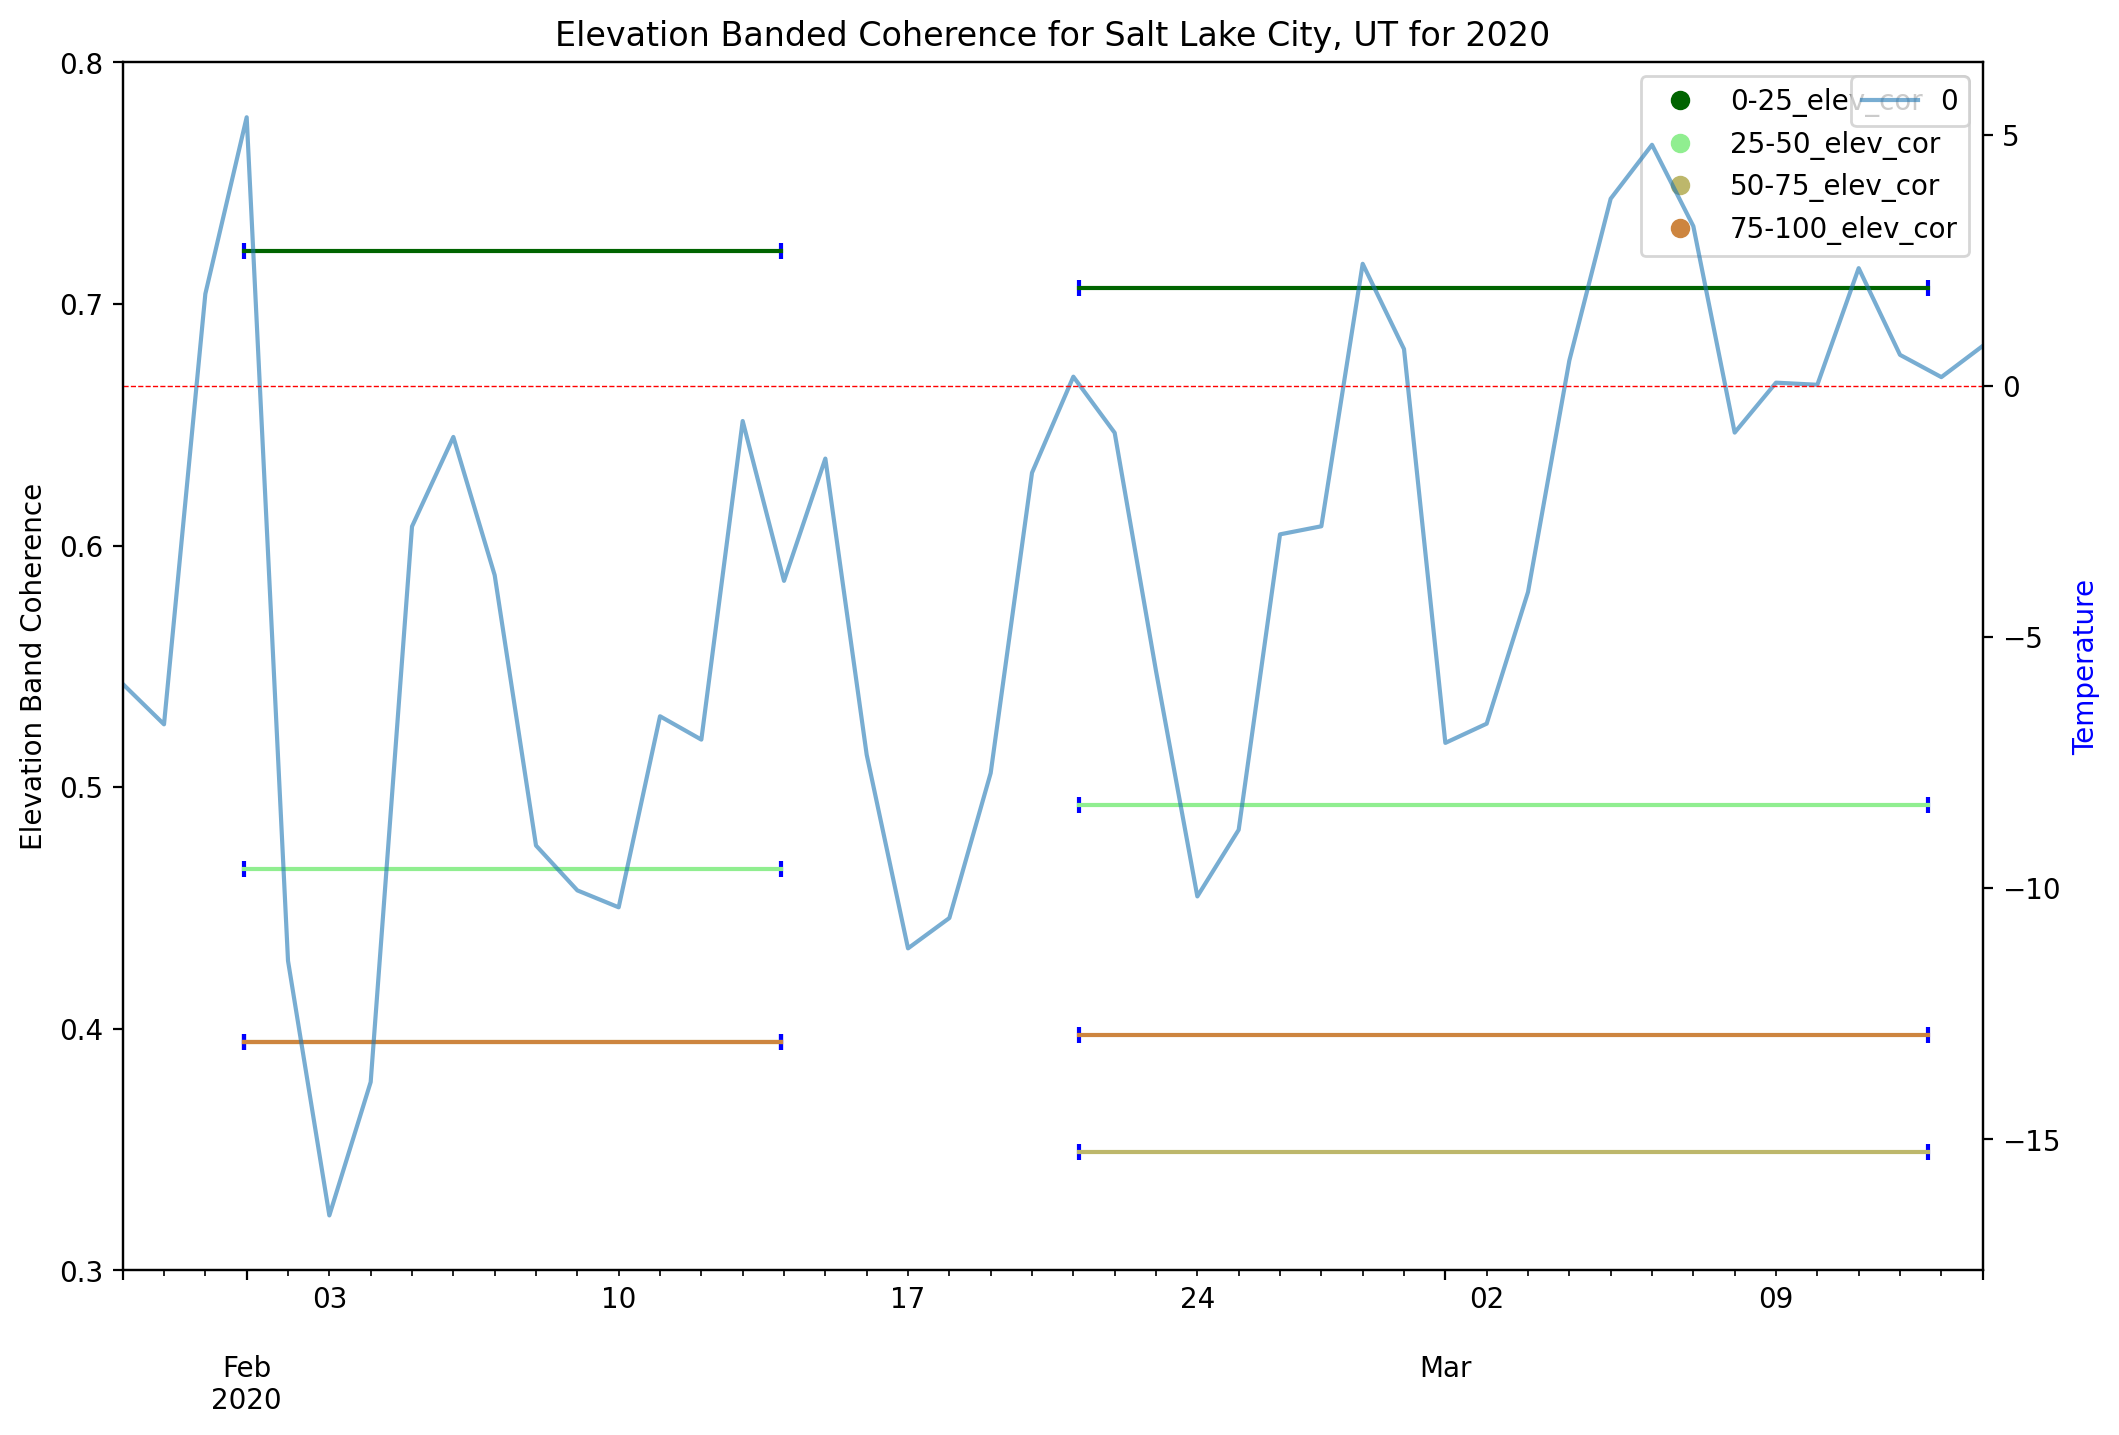

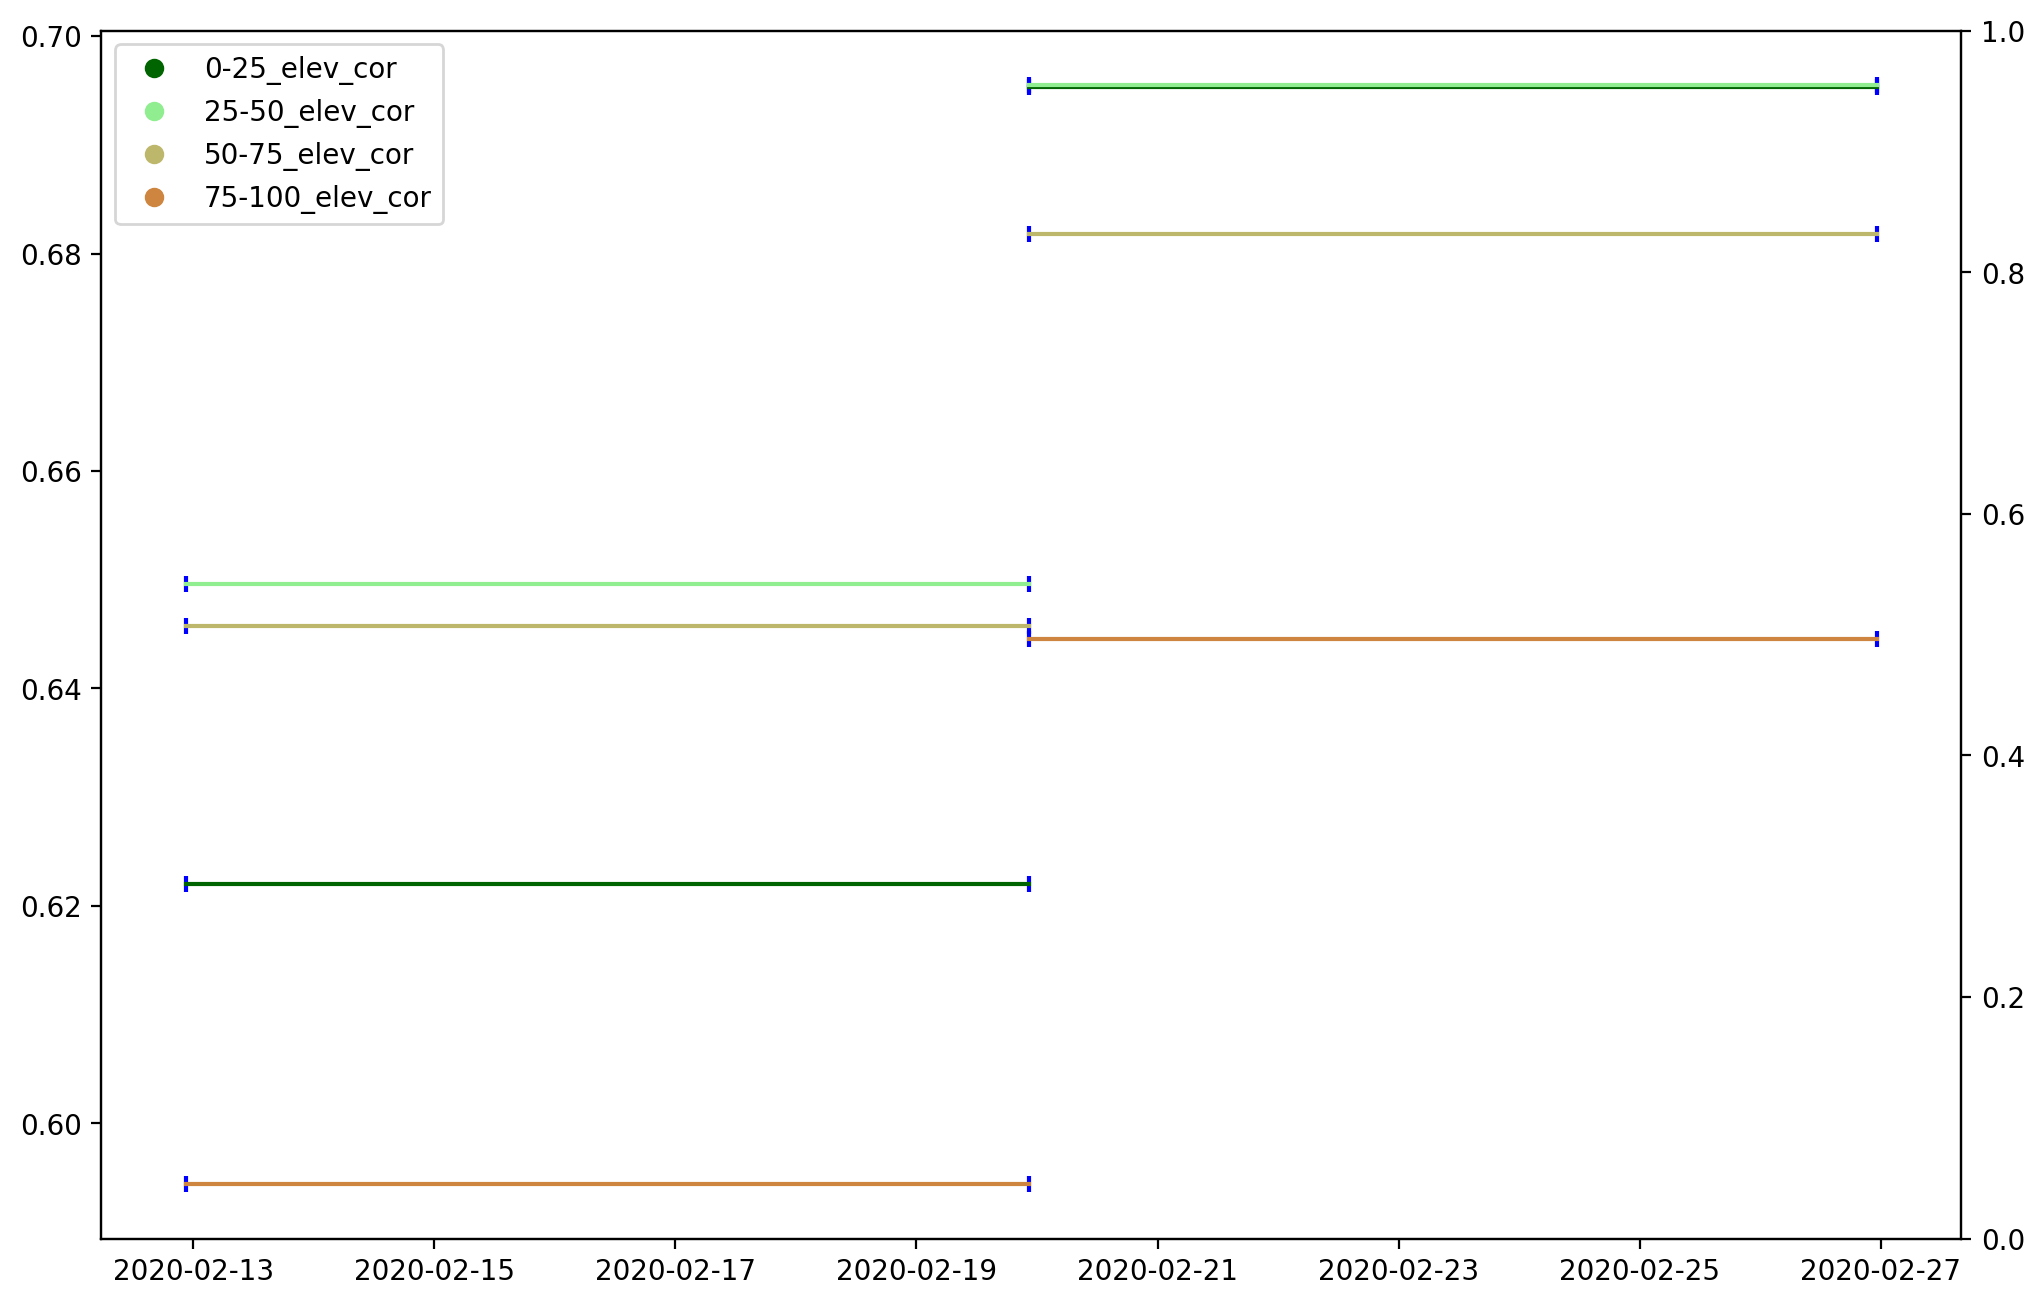

In [77]:
fig_dir = '/bsuhome/zacharykeskinen/uavsar/figures/coherence_wx_elev_compares'
pol_cols = {'VV':'red'}
elev_dic = {'0-25_elev_cor':'darkgreen','25-50_elev_cor':'lightgreen', '50-75_elev_cor':'darkkhaki', '75-100_elev_cor':'peru'}

for loc in locs:
    loc_fps = [dic for dic in full_fps if dic['location'] == loc]
    loc_fig_dir= join(fig_dir, loc.replace(' ',''))
    os.makedirs(loc_fig_dir, exist_ok=True)

    fps_2021 = [fs for fs in loc_fps if fs['flight1'] > pd.to_datetime('2020-10-01').tz_localize('UTC')]
    fps_2021 = [fs for fs in fps_2021 if fs['pol'] == 'VV']
    if len(fps_2021)>1:
        res = pd.DataFrame()
        for i, fps in enumerate(fps_2021):
            if i == 0:
                heading = fps['heading']
            if fps['heading'] == heading:
                cor = rxa.open_rasterio(fps['cor'])
                hgt = rxa.open_rasterio(fps['hgt'])
                d = {} 
                d['pol'] = fps['pol']
                d['date1'] = fps['flight1']
                d['date2'] = fps['flight2']
                elev_quants = hgt.quantile([0.25,0.5,0.75])
                d['0-25_elev_cor'] = np.nanmean(cor.data[0][hgt.data[0]<elev_quants[0].data])
                d['25-50_elev_cor'] = np.nanmean(cor.data[0][(hgt.data[0]>elev_quants[0].data) & (hgt.data[0]<elev_quants[1].data)])
                d['50-75_elev_cor'] = np.nanmean(cor.data[0][(hgt.data[0]>elev_quants[1].data) & (hgt.data[0]<elev_quants[2].data)])
                d['75-100_elev_cor'] = np.nanmean(cor.data[0][hgt.data[0]>elev_quants[2].data])
                res = res.append(d, ignore_index = True)

        f, ax = plt.subplots(figsize = (12,8), dpi = 200)
        for i, r in res.iterrows():
                if r.pol in pol_cols.keys():
                    for col, color in elev_dic.items():
                        plt.scatter(x = [r.date1, r.date2], y = [r[col], r[col]], marker = '|', color = 'blue')
                        plt.plot([r.date1, r.date2], [r[col], r[col]], color = color)

        markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in elev_dic.values()]
        plt.legend(markers, elev_dic.keys(), numpoints=1)

        ax2 = ax.twinx()
        xlims = ax.get_xlim()
        start = pd.to_datetime(mdates.num2date(xlims[0]))
        end = pd.to_datetime(mdates.num2date(xlims[1]))
        wx = get_snotel_within_image(fps['fp'], fps['ann'], start, end)
        t = pd.date_range(start, end, len(wx[next(iter(wx))]['SNOTEL:TOBS_H']))
        # ax2.plot(t, wx[next(iter(wx))]['SNOTEL:TOBS_H'], alpha = 0.6, color = 'blue')
        daily = pd.DataFrame(wx[next(iter(wx))]['SNOTEL:TOBS_H'], index = t).resample('D').mean()
        daily.plot(ax = ax2, alpha = 0.6)
        ax2.axhline(0, ls = '--', linewidth = '.5', color = 'red')


        ax.set_ylabel('Elevation Band Coherence', color='black')
        ax.set_ylim(0.3, 0.8)
        ax2.set_ylabel('Temperature', color='b')

        plt.title(f'Elevation Banded Coherence for {loc} for 2021')
        plt.savefig(join(loc_fig_dir, 'elev_2021.png'), dpi = 200)
        # plt.show()

    fps_2020 = [fs for fs in loc_fps if fs['flight1'] < pd.to_datetime('2020-10-01').tz_localize('UTC')]
    fps_2020 = [fs for fs in fps_2020 if fs['pol'] == 'VV']
    if len(fps_2020)>1:
        res = pd.DataFrame()
        for i, fps in enumerate(fps_2020):
            if i == 0:
                heading = fps['heading']
            if fps['heading'] == heading:
                cor = rxa.open_rasterio(fps['cor'])
                hgt = rxa.open_rasterio(fps['hgt'])
                d = {} 
                d['pol'] = fps['pol']
                d['date1'] = fps['flight1']
                d['date2'] = fps['flight2']
                elev_quants = hgt.quantile([0.25,0.5,0.75])
                d['0-25_elev_cor'] = np.nanmean(cor.data[0][hgt.data[0]<elev_quants[0].data])
                d['25-50_elev_cor'] = np.nanmean(cor.data[0][(hgt.data[0]>elev_quants[0].data) & (hgt.data[0]<elev_quants[1].data)])
                d['50-75_elev_cor'] = np.nanmean(cor.data[0][(hgt.data[0]>elev_quants[1].data) & (hgt.data[0]<elev_quants[2].data)])
                d['75-100_elev_cor'] = np.nanmean(cor.data[0][hgt.data[0]>elev_quants[2].data])
                res = res.append(d, ignore_index = True)

        f, ax = plt.subplots(figsize = (12,8), dpi = 200)
        for i, r in res.iterrows():
                if r.pol in pol_cols.keys():
                    for col, color in elev_dic.items():
                        plt.scatter(x = [r.date1, r.date2], y = [r[col], r[col]], marker = '|', color = 'blue')
                        plt.plot([r.date1, r.date2], [r[col], r[col]], color = color)

        markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in elev_dic.values()]
        plt.legend(markers, elev_dic.keys(), numpoints=1)

        ax2 = ax.twinx()
        xlims = ax.get_xlim()
        start = pd.to_datetime(mdates.num2date(xlims[0]))
        end = pd.to_datetime(mdates.num2date(xlims[1]))
        wx = get_snotel_within_image(fps['fp'], fps['ann'], start, end)
        t = pd.date_range(start, end, len(wx[next(iter(wx))]['SNOTEL:TOBS_H']))
        # ax2.plot(t, wx[next(iter(wx))]['SNOTEL:TOBS_H'])
        daily = pd.DataFrame(wx[next(iter(wx))]['SNOTEL:TOBS_H'], index = t).resample('D').mean()
        daily.plot(ax = ax2, alpha = 0.6)
        ax2.axhline(0, ls = '--', linewidth = '.5', color = 'red')


        ax.set_ylim(0.3, 0.8)
        ax.set_ylabel('Elevation Band Coherence', color='black')
        ax2.set_ylabel('Temperature', color='b')
        plt.title(f'Elevation Banded Coherence for {loc} for 2020')
        plt.savefig(join(loc_fig_dir, 'elev_2020.png'), dpi = 200)
        # plt.show()